In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gaurav/Desktop/Hinglish/data/data4.csv")

In [3]:
df

,ID,Tweet,Sentiment Polarity
0,4330,vist bolest vztek smutek zmatek osam lost bezn...,neutral
1,41616,haan yaar neha pensiv pensiv karega post loudl...,neutral
2,6648,televis media congress liy nahi Ye aapko pata ...,negative
3,2512,all india nrc lagu kare kashmir dhara khatam k...,positive
4,610,pagal they real issu mandir import hindu khatr,neutral
5,14356,jeet dher sari subh kamnay modi asha karta jis...,positive
6,5840,topi wali bo new job hogi humey choti kesi mil...,negative
7,32791,Ye modi media walon maza hindu muslim debat karn,neutral
8,37480,baih tere itjey kya jalti pakistan chutiy khel...,negative
9,16395,hehe I come and actual someon shaadi star struck,neutral


In [4]:
df[df['Tweet']==""]

,ID,Tweet,Sentiment Polarity


In [5]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
70,15581,NaN,neutral
15978,4692,NaN,neutral


In [6]:
for i in range(len(df)):
    if(type(df['Tweet'][i]) !=str):
        df['Tweet'][i] = df['Sentiment Polarity'][i]

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


# Count Vectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
X_train.shape

(14000, 10989)

In [11]:
X_test.shape

(3000, 10989)

In [12]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.603
F1-Score =  0.6069851643361502
[[592 226  82]
 [279 588 233]
 [ 72 299 629]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 1000x600 with 1 Axes>

Best K value =  1


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4786666666666667
F1-Score =  0.43708912494974267
[[164 688  48]
 [ 79 899 122]
 [ 21 606 373]]


In [15]:
from sklearn.tree import DecisionTreeClassifier 


In [16]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [17]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
y_pred = dtree_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5936666666666667
F1-Score =  0.5971306075530114
[[561 269  70]
 [286 558 256]
 [ 75 263 662]]


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [21]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48933333333333334
F1-Score =  0.47450379797060593
[[619 161 120]
 [527 239 334]
 [222 168 610]]


In [23]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.655
F1-Score =  0.6524808367777696
[[723 141  36]
 [359 496 245]
 [ 66 188 746]]


In [24]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6503333333333333
F1-Score =  0.6558389685638343
[[612 236  52]
 [220 666 214]
 [ 35 292 673]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [26]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

3.4616200645764668  minutes


In [27]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.667
F1-Score =  0.6723180892299235
[[610 263  27]
 [231 690 179]
 [ 41 258 701]]


# One Hot Binarizer

In [28]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6063333333333333
F1-Score =  0.6107227072125372
[[592 237  71]
 [272 598 230]
 [ 71 300 629]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

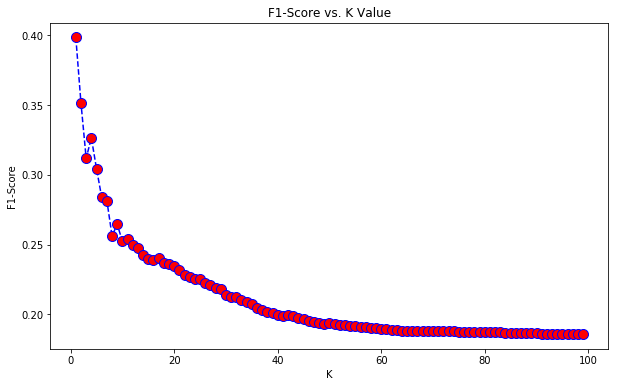

Best K value =  1


In [31]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-2.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.464
F1-Score =  0.3984530875824684
[[106 763  31]
 [ 41 967  92]
 [ 12 669 319]]


In [33]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5826666666666667
F1-Score =  0.5851170259198717
[[574 242  84]
 [316 519 265]
 [ 85 260 655]]


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.491
F1-Score =  0.4756664852337114
[[621 160 119]
 [535 236 329]
 [219 165 616]]


In [35]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6546666666666666
F1-Score =  0.6521780304424724
[[717 141  42]
 [344 498 258]
 [ 62 189 749]]


In [36]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.653
F1-Score =  0.6581899650256283
[[613 231  56]
 [226 667 207]
 [ 34 287 679]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.4509668827056883  minutes
Accuracy Score =  0.6653333333333333
F1-Score =  0.6701381854873464
[[604 262  34]
 [228 682 190]
 [ 41 249 710]]


# Tf-IDF Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.662
F1-Score =  0.6663734650553056
[[661 203  36]
 [268 628 204]
 [ 43 260 697]]


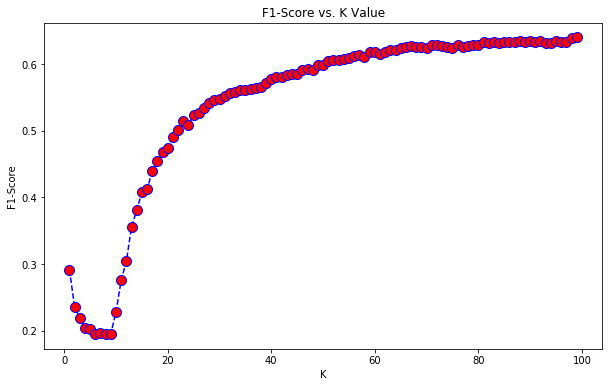

Best K value =  99


In [41]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6376666666666667
F1-Score =  0.640068592345736
[[478 374  48]
 [142 746 212]
 [ 31 280 689]]


In [43]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5606666666666666
F1-Score =  0.5640635396277671
[[543 269  88]
 [323 525 252]
 [ 99 287 614]]


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.481
F1-Score =  0.47078763920981476
[[568 202 130]
 [487 263 350]
 [199 189 612]]


In [45]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.666
F1-Score =  0.6700700106785918
[[640 224  36]
 [236 631 233]
 [ 39 234 727]]


In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6716666666666666
F1-Score =  0.675800303873178
[[651 208  41]
 [240 650 210]
 [ 42 244 714]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.2029059012730916  minutes
Accuracy Score =  0.6636666666666666
F1-Score =  0.6678205070767893
[[628 236  36]
 [259 650 191]
 [ 51 236 713]]


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1), min_df=3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [50]:
X_train.shape

(14000, 7437)

In [51]:
X_test.shape

(3000, 7437)

In [52]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6056666666666667
F1-Score =  0.6096095786593062
[[589 230  81]
 [266 609 225]
 [ 80 301 619]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

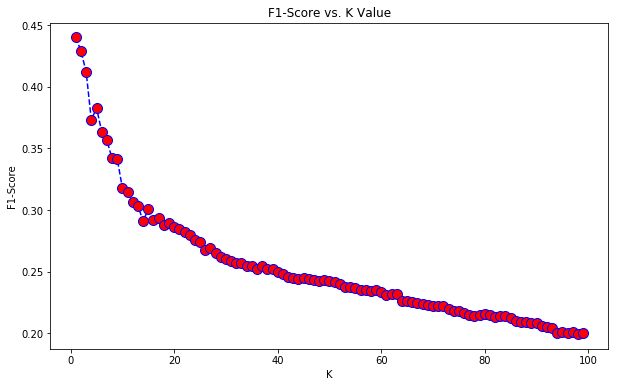

Best K value =  1


In [53]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48133333333333334
F1-Score =  0.4400663901685677
[[153 678  69]
 [ 81 872 147]
 [ 31 550 419]]


In [55]:
from sklearn.tree import DecisionTreeClassifier 


In [56]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [57]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [58]:
y_pred = dtree_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5783333333333334
F1-Score =  0.5826680881679737
[[553 278  69]
 [289 549 262]
 [ 76 291 633]]


In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [61]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.501
F1-Score =  0.47432250130543135
[[645 124 131]
 [528 184 388]
 [191 135 674]]


In [63]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.652
F1-Score =  0.6497517795972205
[[719 145  36]
 [356 496 248]
 [ 67 192 741]]


In [64]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.645
F1-Score =  0.650229139480075
[[607 235  58]
 [215 671 214]
 [ 45 298 657]]


In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [66]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

2.698296582698822  minutes


In [67]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6603333333333333
F1-Score =  0.6653429484818875
[[610 255  35]
 [240 676 184]
 [ 45 260 695]]


# One Hot Binarizer

In [68]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [69]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [70]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.608
F1-Score =  0.6121321948829882
[[588 239  73]
 [261 608 231]
 [ 78 294 628]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

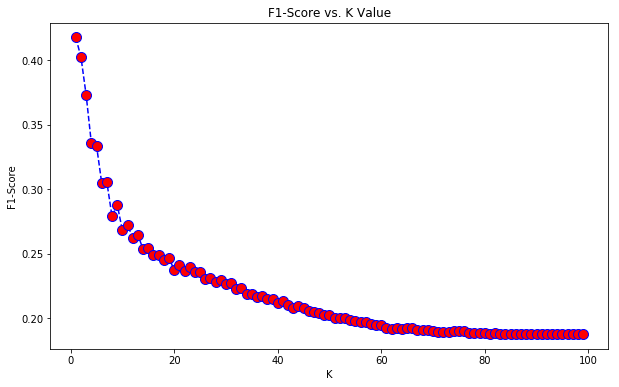

Best K value =  1


In [71]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-2.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4726666666666667
F1-Score =  0.41743452284547944
[[111 710  79]
 [ 44 895 161]
 [ 16 572 412]]


In [73]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5723333333333334
F1-Score =  0.5749194614158849
[[583 218  99]
 [319 505 276]
 [ 83 288 629]]


In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.501
F1-Score =  0.47302906534861583
[[649 122 129]
 [529 178 393]
 [194 130 676]]


In [75]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.656
F1-Score =  0.6535176742399703
[[719 138  43]
 [338 501 261]
 [ 64 188 748]]


In [76]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.647
F1-Score =  0.6522060366024931
[[604 239  57]
 [225 661 214]
 [ 36 288 676]]


In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.7550671537717184  minutes
Accuracy Score =  0.6526666666666666
F1-Score =  0.657754175905133
[[612 249  39]
 [235 655 210]
 [ 43 266 691]]


# Tf-IDF Vectorizer

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(min_df=3)
features2 = tfidf.fit_transform(df['Tweet'])

In [79]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [80]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.659
F1-Score =  0.6632283891969634
[[654 208  38]
 [265 629 206]
 [ 50 256 694]]


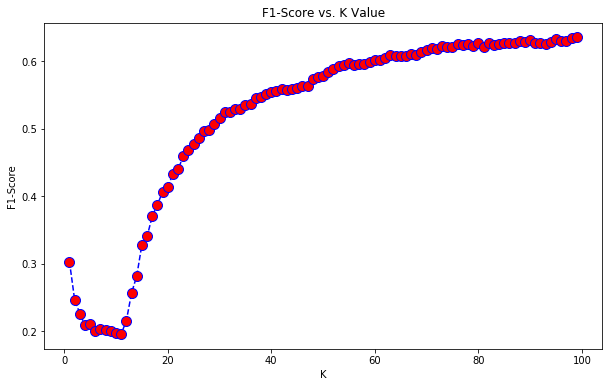

Best K value =  99


In [81]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.633
F1-Score =  0.634975834235048
[[454 405  41]
 [117 793 190]
 [ 23 325 652]]


In [83]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.566
F1-Score =  0.5697701060358823
[[550 276  74]
 [289 527 284]
 [ 95 284 621]]


In [84]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.495
F1-Score =  0.47258244203045363
[[607 149 144]
 [500 201 399]
 [176 147 677]]


In [85]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6623333333333333
F1-Score =  0.6661846601239659
[[648 216  36]
 [249 615 236]
 [ 40 236 724]]


In [86]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6703333333333333
F1-Score =  0.6742727966403645
[[646 212  42]
 [239 648 213]
 [ 45 238 717]]


In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.554348297913869  minutes
Accuracy Score =  0.6656666666666666
F1-Score =  0.6689875245475885
[[632 228  40]
 [269 635 196]
 [ 53 217 730]]


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 1), min_df=5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [90]:
X_train.shape

(14000, 4885)

In [91]:
X_test.shape

(3000, 4885)

In [92]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.605
F1-Score =  0.6090274385537291
[[603 216  81]
 [269 593 238]
 [ 76 305 619]]


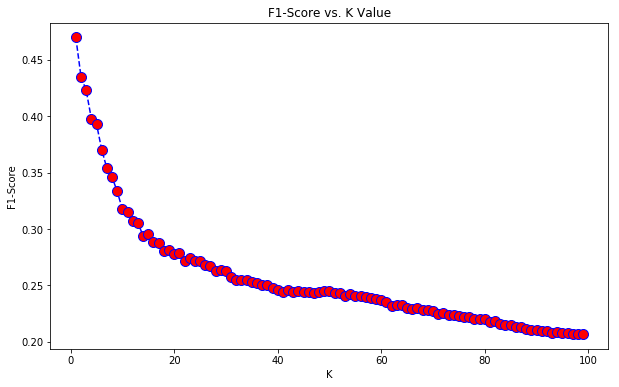

Best K value =  1


In [93]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.502
F1-Score =  0.46969387428490156
[[175 659  66]
 [ 93 830 177]
 [ 37 462 501]]


In [95]:
from sklearn.tree import DecisionTreeClassifier 


In [96]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [97]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [98]:
y_pred = dtree_model.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.574
F1-Score =  0.5777892428813902
[[545 279  76]
 [289 541 270]
 [ 82 282 636]]


In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [101]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5156666666666667
F1-Score =  0.4706262415272247
[[711  71 118]
 [589 121 390]
 [197  88 715]]


In [103]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6513333333333333
F1-Score =  0.6491585683292064
[[725 141  34]
 [366 494 240]
 [ 66 199 735]]


In [104]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6446666666666667
F1-Score =  0.6498288032708935
[[606 235  59]
 [221 663 216]
 [ 42 293 665]]


In [105]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [106]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

2.4178703665733337  minutes


In [107]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6613333333333333
F1-Score =  0.6657389368004454
[[612 249  39]
 [242 662 196]
 [ 46 244 710]]


# One Hot Binarizer

In [108]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [109]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [110]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6113333333333333
F1-Score =  0.6154474156832396
[[610 221  69]
 [278 599 223]
 [ 77 298 625]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

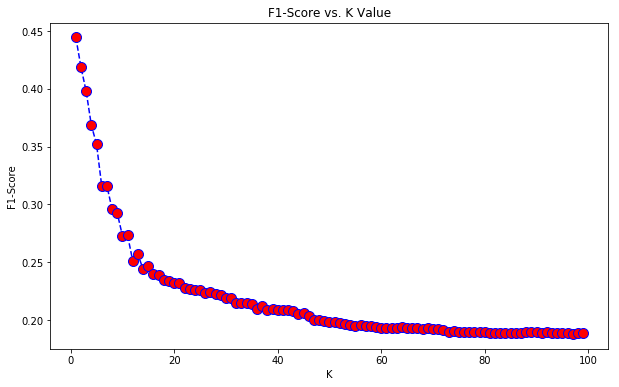

Best K value =  1


In [111]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-2.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4866666666666667
F1-Score =  0.44444180459684013
[[140 662  98]
 [ 61 832 207]
 [ 20 492 488]]


In [113]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5633333333333334
F1-Score =  0.5658929865014415
[[552 253  95]
 [306 493 301]
 [ 79 276 645]]


In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5143333333333333
F1-Score =  0.4648091980785711
[[716  68 116]
 [597 105 398]
 [202  76 722]]


In [115]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6533333333333333
F1-Score =  0.6513263250554399
[[717 143  40]
 [349 502 249]
 [ 64 195 741]]


In [116]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.649
F1-Score =  0.6540816398234814
[[613 224  63]
 [219 663 218]
 [ 38 291 671]]


In [117]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.444449547926585  minutes
Accuracy Score =  0.6573333333333333
F1-Score =  0.6618092605787773
[[617 240  43]
 [233 652 215]
 [ 46 251 703]]


# Tf-IDF Vectorizer

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(min_df=5)
features2 = tfidf.fit_transform(df['Tweet'])

In [119]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [120]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6623333333333333
F1-Score =  0.6662860897093732
[[663 200  37]
 [264 630 206]
 [ 55 251 694]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

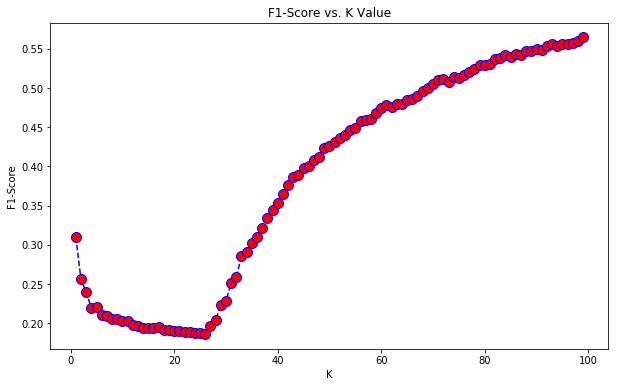

Best K value =  99


In [121]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5813333333333334
F1-Score =  0.5645200294457449
[[293 590  17]
 [ 44 951 105]
 [ 12 488 500]]


In [123]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.565
F1-Score =  0.5671661390428498
[[551 248 101]
 [295 490 315]
 [ 77 269 654]]


In [124]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5163333333333333
F1-Score =  0.47573244956280686
[[687  86 127]
 [553 138 409]
 [181  95 724]]


In [125]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.663
F1-Score =  0.6662803639708518
[[657 207  36]
 [260 605 235]
 [ 45 228 727]]


In [126]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6676666666666666
F1-Score =  0.6719045768749243
[[641 218  41]
 [238 651 211]
 [ 44 245 711]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.1133042136828104  minutes
Accuracy Score =  0.6633333333333333
F1-Score =  0.6664220476114232
[[637 219  44]
 [274 626 200]
 [ 55 218 727]]


# Uni-Bigrams

# Count Vectorizer

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df=1)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [130]:
X_train.shape

(14000, 160495)

In [131]:
X_test.shape

(3000, 160495)

In [132]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6556666666666666
F1-Score =  0.6611818208597984
[[585 269  46]
 [204 719 177]
 [ 34 303 663]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

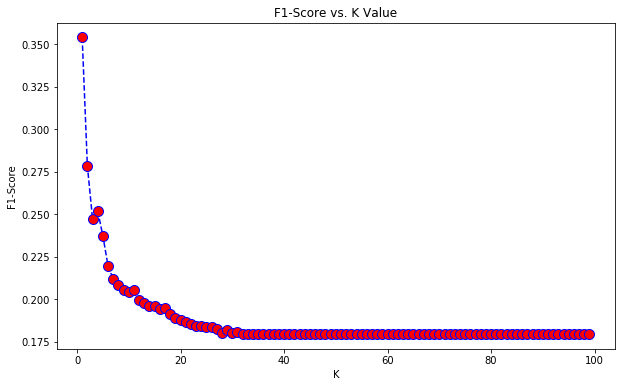

Best K value =  1


In [133]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.441
F1-Score =  0.3540116205733829
[[  88  801   11]
 [  25 1017   58]
 [  10  772  218]]


In [135]:
from sklearn.tree import DecisionTreeClassifier 


In [136]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [137]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [138]:
y_pred = dtree_model.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.591
F1-Score =  0.5940863778430968
[[569 257  74]
 [289 542 269]
 [ 78 260 662]]


In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [141]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [142]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5256666666666666
F1-Score =  0.5201369165744579
[[606 210  84]
 [469 333 298]
 [159 203 638]]


In [143]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6493333333333333
F1-Score =  0.6457641581585793
[[713 143  44]
 [359 480 261]
 [ 68 177 755]]


In [144]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [145]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [146]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6713333333333333
F1-Score =  0.6763553132337897
[[609 245  46]
 [191 720 189]
 [ 39 276 685]]


In [147]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [148]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

40.986534996827444  minutes


In [149]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6706666666666666
F1-Score =  0.6760617369737402
[[560 320  20]
 [174 779 147]
 [ 34 293 673]]


# One Hot Binarizer

In [150]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [151]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [152]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6503333333333333
F1-Score =  0.656148229055151
[[578 280  42]
 [203 718 179]
 [ 34 311 655]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

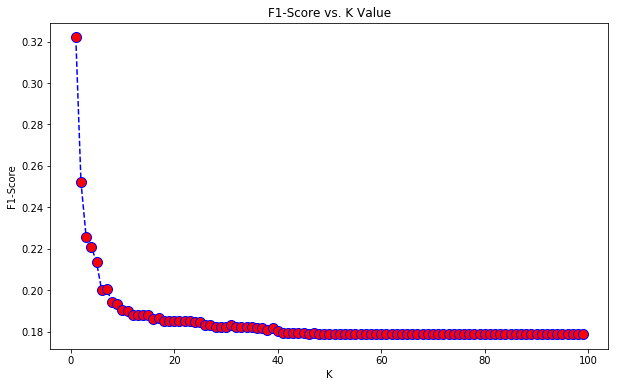

Best K value =  1


In [153]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4256666666666667
F1-Score =  0.32196058265371585
[[  70  827    3]
 [  21 1039   40]
 [   8  824  168]]


In [155]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5886666666666667
F1-Score =  0.5924260240308515
[[577 250  73]
 [300 547 253]
 [ 76 282 642]]


In [156]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5256666666666666
F1-Score =  0.5202439541711222
[[609 210  81]
 [476 333 291]
 [164 201 635]]


In [157]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6486666666666666
F1-Score =  0.6448832549403534
[[708 145  47]
 [356 478 266]
 [ 67 173 760]]


In [158]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.668
F1-Score =  0.6730868776534727
[[599 256  45]
 [196 718 186]
 [ 36 277 687]]


In [159]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

37.462943732738495  minutes
Accuracy Score =  0.669
F1-Score =  0.6743776257398837
[[562 312  26]
 [172 776 152]
 [ 32 299 669]]


# Tf-IDF Vectorizer

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(ngram_range=(1, 2), min_df=1)
features2 = tfidf.fit_transform(df['Tweet'])

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [162]:
X_train.shape

(14000, 160495)

In [163]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6696666666666666
F1-Score =  0.6749779020805043
[[624 244  32]
 [230 690 180]
 [ 39 266 695]]


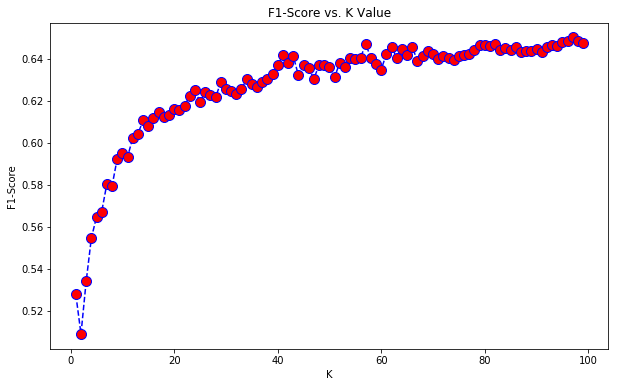

Best K value =  97


In [164]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6496666666666666
F1-Score =  0.6500206542467367
[[591 238  71]
 [231 576 293]
 [ 42 176 782]]


In [166]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.577
F1-Score =  0.5809478592933227
[[540 266  94]
 [278 569 253]
 [ 73 305 622]]


In [167]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5136666666666667
F1-Score =  0.5129173177729381
[[539 260 101]
 [410 380 310]
 [132 246 622]]


In [168]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6606666666666666
F1-Score =  0.6634820144859627
[[488 375  37]
 [111 789 200]
 [ 18 277 705]]


In [169]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6676666666666666
F1-Score =  0.6719595971176936
[[630 229  41]
 [246 659 195]
 [ 42 244 714]]


In [170]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

36.88927926619848  minutes
Accuracy Score =  0.6683333333333333
F1-Score =  0.6739246660391416
[[582 291  27]
 [191 765 144]
 [ 38 304 658]]


# Count Vectorizer

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### ---------------------------------------------------------------------------------------------------------------------------------------

In [173]:
X_train.shape

(14000, 28300)

In [174]:
X_test.shape

(3000, 28300)

In [175]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6163333333333333
F1-Score =  0.6209813176309155
[[593 233  74]
 [257 623 220]
 [ 59 308 633]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

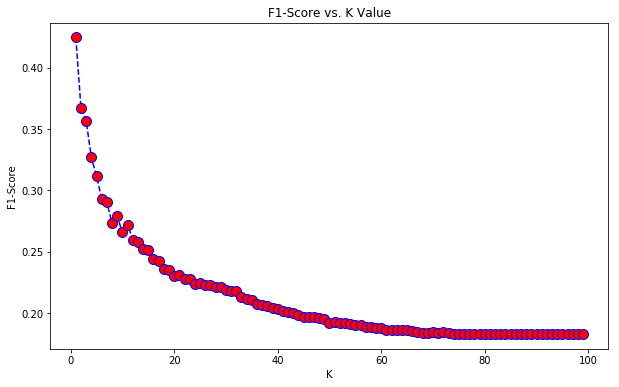

Best K value =  1


In [176]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4776666666666667
F1-Score =  0.4245073478612625
[[133 719  48]
 [ 46 936 118]
 [ 14 622 364]]


In [178]:
from sklearn.tree import DecisionTreeClassifier 


In [179]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [180]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [181]:
y_pred = dtree_model.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.579
F1-Score =  0.5813138647424837
[[566 258  76]
 [307 505 288]
 [ 82 252 666]]


In [183]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [184]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5223333333333333
F1-Score =  0.5171773147737179
[[607 210  83]
 [475 334 291]
 [171 203 626]]


In [186]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6516666666666666
F1-Score =  0.6508448962834956
[[721 144  35]
 [364 513 223]
 [ 66 213 721]]


In [187]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [188]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [189]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6513333333333333
F1-Score =  0.6563970883576954
[[608 237  55]
 [223 671 206]
 [ 40 285 675]]


In [190]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [191]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

6.602801831563314  minutes


In [192]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6693333333333333
F1-Score =  0.6748283717613354
[[598 274  28]
 [215 732 153]
 [ 42 280 678]]


# One Hot Binarizer

In [193]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [194]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [195]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6123333333333333
F1-Score =  0.6169612419004996
[[579 247  74]
 [251 631 218]
 [ 63 310 627]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

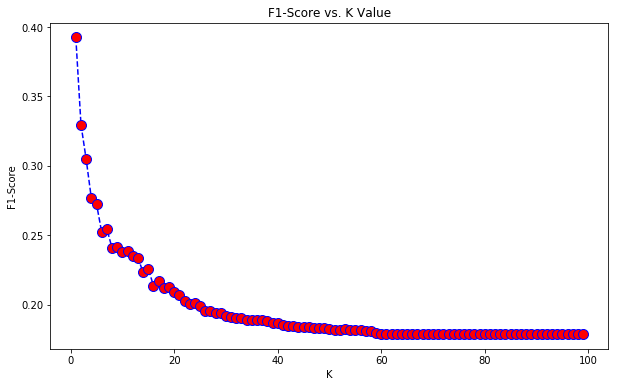

Best K value =  1


In [196]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4633333333333333
F1-Score =  0.39249465951298274
[[ 97 774  29]
 [ 29 983  88]
 [ 14 676 310]]


In [198]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5736666666666667
F1-Score =  0.576826505148202
[[554 265  81]
 [318 521 261]
 [ 81 273 646]]


In [199]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5233333333333333
F1-Score =  0.5181244171515301
[[609 210  81]
 [481 333 286]
 [171 201 628]]


In [200]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.654
F1-Score =  0.6536916423454907
[[709 153  38]
 [347 526 227]
 [ 64 209 727]]


In [201]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.656
F1-Score =  0.6607960436151105
[[608 231  61]
 [217 682 201]
 [ 39 283 678]]


In [202]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

11.606863447030385  minutes
Accuracy Score =  0.67
F1-Score =  0.6754894875401204
[[597 277  26]
 [218 723 159]
 [ 40 270 690]]


# Tf-IDF Vectorizer

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2),min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [204]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [205]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.662
F1-Score =  0.6662839396525424
[[640 220  40]
 [264 635 201]
 [ 40 249 711]]


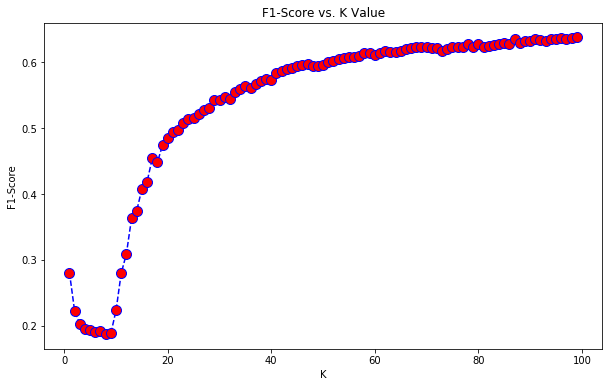

Best K value =  99


In [206]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [207]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6343333333333333
F1-Score =  0.6379038950707517
[[483 387  30]
 [136 813 151]
 [ 27 366 607]]


In [208]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5666666666666667
F1-Score =  0.5700783682347202
[[539 270  91]
 [307 541 252]
 [ 92 288 620]]


In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5103333333333333
F1-Score =  0.5102723913318615
[[539 260 101]
 [416 388 296]
 [146 250 604]]


In [210]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6676666666666666
F1-Score =  0.6729658478302434
[[608 255  37]
 [208 697 195]
 [ 35 267 698]]


In [211]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.676
F1-Score =  0.6797886197428795
[[653 203  44]
 [252 653 195]
 [ 41 237 722]]


In [212]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

362.9604584534963  minutes
Accuracy Score =  0.666
F1-Score =  0.6711214251936282
[[612 258  30]
 [239 690 171]
 [ 46 258 696]]


# Count Vectorizer

In [213]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df = 3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [215]:
X_train.shape

(14000, 13036)

In [216]:
X_test.shape

(3000, 13036)

In [217]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5983333333333334
F1-Score =  0.6023088037011671
[[578 233  89]
 [269 607 224]
 [ 78 312 610]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

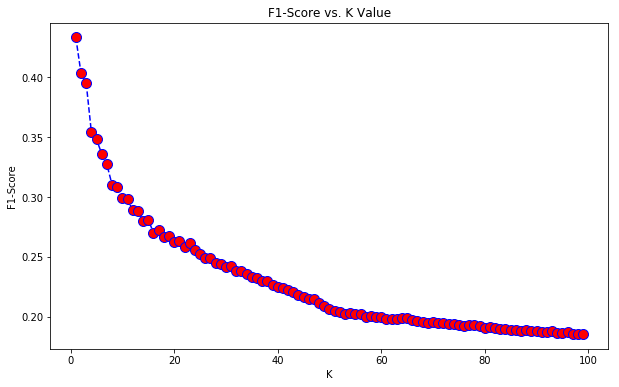

Best K value =  1


In [218]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48233333333333334
F1-Score =  0.43312728036236176
[[132 702  66]
 [ 64 903 133]
 [ 31 557 412]]


In [220]:
from sklearn.tree import DecisionTreeClassifier 


In [221]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [222]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [223]:
y_pred = dtree_model.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.581
F1-Score =  0.5837466395151751
[[557 263  80]
 [311 531 258]
 [ 88 257 655]]


In [225]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [226]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [227]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5066666666666667
F1-Score =  0.4937219235161287
[[631 166 103]
 [538 260 302]
 [199 172 629]]


In [228]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6503333333333333
F1-Score =  0.6494861635971694
[[722 144  34]
 [371 511 218]
 [ 70 212 718]]


In [229]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [230]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [231]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6426666666666667
F1-Score =  0.6481034540399001
[[608 235  57]
 [231 663 206]
 [ 39 304 657]]


In [232]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [233]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

3.778996721903483  minutes


In [234]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.662
F1-Score =  0.6673690735617691
[[607 260  33]
 [234 699 167]
 [ 45 275 680]]


# One Hot Binarizer

In [235]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [236]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [237]:
X_train.shape

(14000, 13036)

In [238]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6023333333333334
F1-Score =  0.6066000168901879
[[573 248  79]
 [266 625 209]
 [ 76 315 609]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

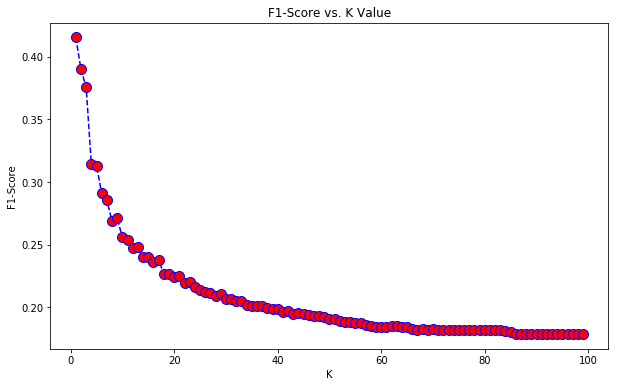

Best K value =  1


In [239]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4756666666666667
F1-Score =  0.4153135187302615
[[ 99 717  84]
 [ 31 908 161]
 [ 16 564 420]]


In [241]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5683333333333334
F1-Score =  0.5713621141374257
[[577 242  81]
 [315 500 285]
 [ 88 284 628]]


In [242]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5023333333333333
F1-Score =  0.4893647311198868
[[630 169 101]
 [541 256 303]
 [208 171 621]]


In [243]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.656
F1-Score =  0.6552456035749681
[[719 145  36]
 [351 522 227]
 [ 67 206 727]]


In [244]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6506666666666666
F1-Score =  0.655350352200693
[[597 238  65]
 [219 678 203]
 [ 39 284 677]]


In [245]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.880912248293559  minutes
Accuracy Score =  0.6556666666666666
F1-Score =  0.660954668265275
[[604 260  36]
 [234 681 185]
 [ 45 273 682]]


# Tf-IDF Vectorizer

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df = 3)
features2 = tfidf.fit_transform(df['Tweet'])

In [247]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [248]:
X_train.shape

(14000, 13036)

In [249]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.659
F1-Score =  0.6631600993957004
[[645 214  41]
 [262 628 210]
 [ 45 251 704]]


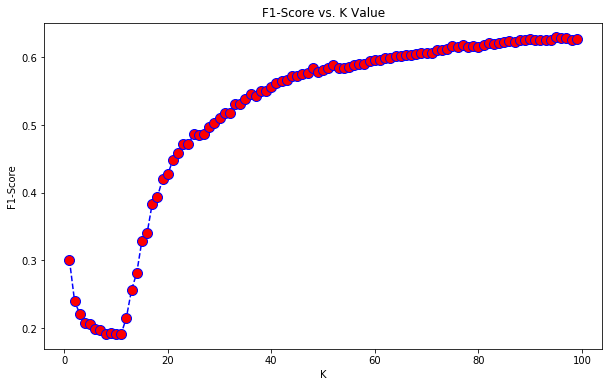

Best K value =  95


In [250]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [251]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6276666666666667
F1-Score =  0.629176725321221
[[451 424  25]
 [122 847 131]
 [ 26 389 585]]


In [252]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5636666666666666
F1-Score =  0.5666777948758809
[[532 276  92]
 [291 537 272]
 [102 276 622]]


In [253]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5016666666666667
F1-Score =  0.4929471557035148
[[582 199 119]
 [474 288 338]
 [157 208 635]]


In [254]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6723333333333333
F1-Score =  0.676836722725816
[[656 207  37]
 [232 658 210]
 [ 44 253 703]]


In [255]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6726666666666666
F1-Score =  0.6764897399396602
[[647 208  45]
 [242 650 208]
 [ 42 237 721]]


In [256]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.4629110654195148  minutes
Accuracy Score =  0.662
F1-Score =  0.6666819419219703
[[625 241  34]
 [262 658 180]
 [ 48 249 703]]


# Count Vectorizer

In [257]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df = 5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [259]:
X_train.shape

(14000, 6834)

In [260]:
X_test.shape

(3000, 6834)

In [261]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6086666666666667
F1-Score =  0.6131201034649234
[[604 225  71]
 [286 616 198]
 [ 74 320 606]]


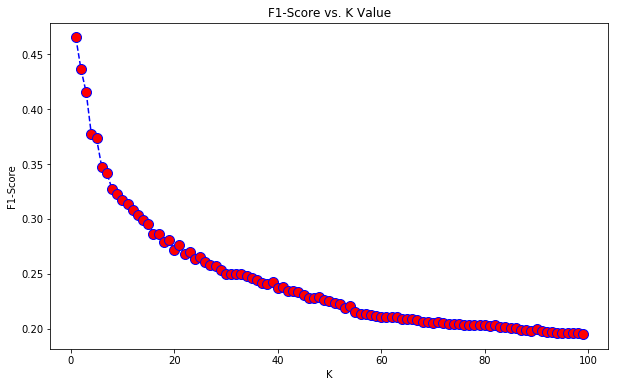

Best K value =  1


In [262]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [263]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5003333333333333
F1-Score =  0.4652708995013118
[[168 662  70]
 [ 86 844 170]
 [ 37 474 489]]


In [264]:
from sklearn.tree import DecisionTreeClassifier 


In [265]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [266]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [267]:
y_pred = dtree_model.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5666666666666667
F1-Score =  0.5685889885790975
[[547 264  89]
 [308 488 304]
 [ 79 256 665]]


In [269]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [270]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [271]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5033333333333333
F1-Score =  0.4687445580126064
[[717  93  90]
 [681 143 276]
 [257  93 650]]


In [272]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6513333333333333
F1-Score =  0.6500222132066192
[[734 135  31]
 [385 503 212]
 [ 69 214 717]]


In [273]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [274]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [275]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6456666666666667
F1-Score =  0.651032844623788
[[607 229  64]
 [227 669 204]
 [ 33 306 661]]


In [276]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [277]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

2.750848380724589  minutes


In [278]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6626666666666666
F1-Score =  0.6675805615694014
[[614 249  37]
 [246 674 180]
 [ 42 258 700]]


# One Hot Binarizer

In [279]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [280]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [281]:
X_train.shape

(14000, 6834)

In [282]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.609
F1-Score =  0.6133173349110123
[[594 230  76]
 [285 612 203]
 [ 70 309 621]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

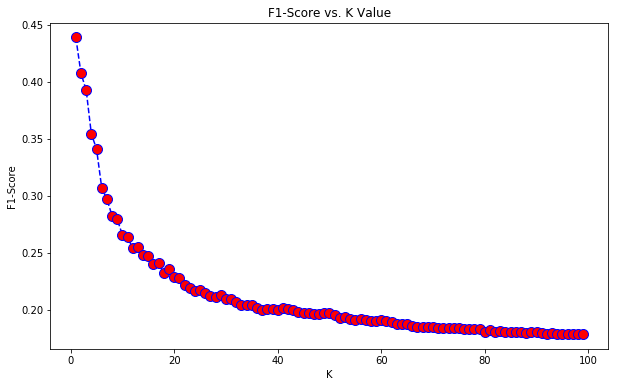

Best K value =  1


In [283]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [284]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4826666666666667
F1-Score =  0.4389034309994228
[[138 659 103]
 [ 60 842 198]
 [ 25 507 468]]


In [285]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.566
F1-Score =  0.5681662708481107
[[542 270  88]
 [314 494 292]
 [ 79 259 662]]


In [286]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49766666666666665
F1-Score =  0.4621618229961853
[[720  92  88]
 [687 136 277]
 [271  92 637]]


In [287]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6536666666666666
F1-Score =  0.6521944078465819
[[731 136  33]
 [369 507 224]
 [ 70 207 723]]


In [288]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6476666666666666
F1-Score =  0.6530064163429457
[[608 235  57]
 [232 674 194]
 [ 37 302 661]]


In [289]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.6920989831288655  minutes
Accuracy Score =  0.654
F1-Score =  0.6586232463304719
[[610 247  43]
 [247 651 202]
 [ 43 256 701]]


# Tf-IDF Vectorizer

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 2), min_df = 5)
features2 = tfidf.fit_transform(df['Tweet'])

In [291]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [292]:
X_train.shape

(14000, 6834)

In [293]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6636666666666666
F1-Score =  0.6675564852432551
[[653 207  40]
 [261 630 209]
 [ 48 244 708]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

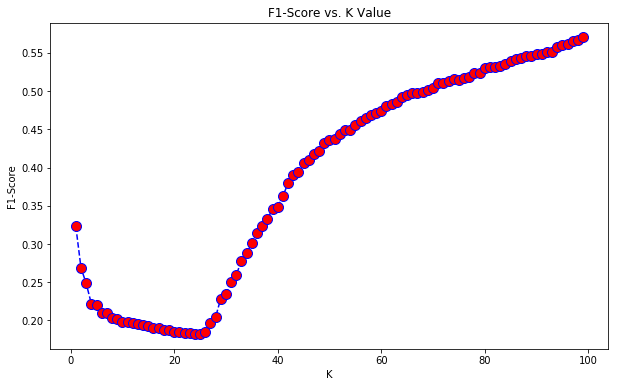

Best K value =  99


In [294]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [295]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5866666666666667
F1-Score =  0.5701365711232941
[[309 580  11]
 [ 41 981  78]
 [  9 521 470]]


In [296]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5756666666666667
F1-Score =  0.5791826272061507
[[564 243  93]
 [293 542 265]
 [ 84 295 621]]


In [297]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5143333333333333
F1-Score =  0.4818268848497951
[[699 112  89]
 [626 159 315]
 [209 106 685]]


In [298]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.666
F1-Score =  0.669962723756858
[[665 199  36]
 [264 626 210]
 [ 45 248 707]]


In [299]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.669
F1-Score =  0.6730902843940963
[[645 211  44]
 [242 650 208]
 [ 43 245 712]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [300]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.3457165320714313  minutes
Accuracy Score =  0.6616666666666666
F1-Score =  0.6658202444065231
[[632 232  36]
 [268 645 187]
 [ 54 238 708]]


# Bigrams

# Count Vectorizer

In [301]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df=1)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [302]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [303]:
X_train.shape

(14000, 135572)

In [304]:
X_test.shape

(3000, 135572)

In [305]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5356666666666666
F1-Score =  0.5148342236895443
[[265 602  33]
 [ 99 906  95]
 [ 25 539 436]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

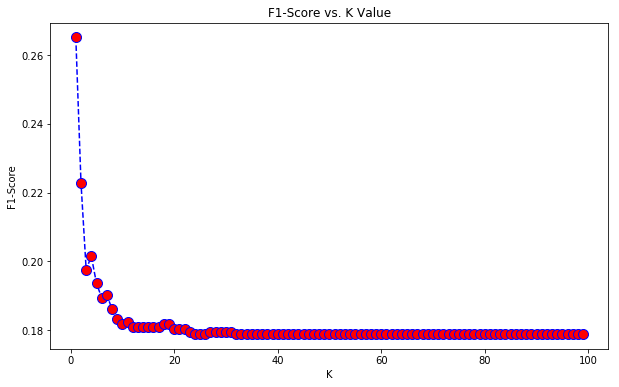

Best K value =  1


In [306]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [307]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.399
F1-Score =  0.2651437828824182
[[  39  859    2]
 [  12 1061   27]
 [   4  899   97]]


In [308]:
from sklearn.tree import DecisionTreeClassifier 


In [309]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [310]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [311]:
y_pred = dtree_model.predict(X_test)

In [312]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5163333333333333
F1-Score =  0.49232969875411836
[[251 615  34]
 [110 899  91]
 [ 30 571 399]]


In [313]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [314]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [315]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5086666666666667
F1-Score =  0.49198487527087537
[[655 151  94]
 [576 236 288]
 [222 143 635]]


In [316]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5506666666666666
F1-Score =  0.548847501883217
[[631 193  76]
 [458 401 241]
 [158 222 620]]


In [317]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [318]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [319]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.547
F1-Score =  0.5359620630777383
[[323 538  39]
 [137 862 101]
 [ 32 512 456]]


In [320]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [321]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

74.99642014900843  minutes


In [322]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.503
F1-Score =  0.45281236986247336
[[163 727  10]
 [ 43 999  58]
 [ 11 642 347]]


# One Hot Binarizer

In [323]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [324]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [325]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5383333333333333
F1-Score =  0.5169712020355216
[[267 601  32]
 [ 97 917  86]
 [ 24 545 431]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

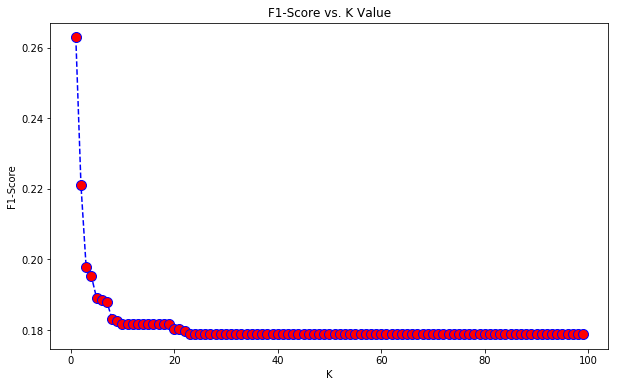

Best K value =  1


In [326]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [327]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39866666666666667
F1-Score =  0.2628702103317808
[[  39  859    2]
 [  12 1065   23]
 [   3  905   92]]


In [328]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.513
F1-Score =  0.4888436192947471
[[250 615  35]
 [114 895  91]
 [ 31 575 394]]


In [329]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.51
F1-Score =  0.49338095955860556
[[659 151  90]
 [583 236 281]
 [223 142 635]]


In [330]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.552
F1-Score =  0.5497669723811914
[[626 195  79]
 [453 399 248]
 [158 211 631]]


In [331]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.544
F1-Score =  0.532186885691439
[[320 542  38]
 [141 867  92]
 [ 31 524 445]]


In [332]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

76.4224636634191  minutes
Accuracy Score =  0.506
F1-Score =  0.4567817896841224
[[ 167  723   10]
 [  41 1001   58]
 [  10  640  350]]


# Tf-IDF Vectorizer

In [333]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(ngram_range=(2, 2), min_df=1)
features2 = tfidf.fit_transform(df['Tweet'])

In [334]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [335]:
X_train.shape

(14000, 135572)

In [336]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.537
F1-Score =  0.52720118942117
[[335 551  14]
 [166 859  75]
 [ 39 544 417]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

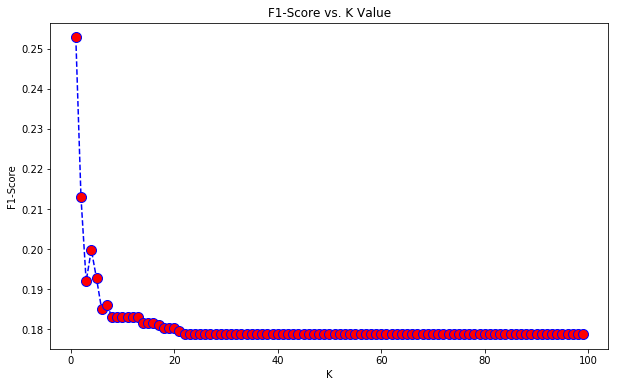

Best K value =  1


In [337]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [338]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39366666666666666
F1-Score =  0.25275591019821764
[[  37  861    2]
 [  11 1067   22]
 [   4  919   77]]


In [339]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49933333333333335
F1-Score =  0.4748678868170891
[[252 603  45]
 [124 874 102]
 [ 44 584 372]]


In [340]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.499
F1-Score =  0.4825821104538223
[[485 178 237]
 [315 260 525]
 [ 82 166 752]]


In [341]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5506666666666666
F1-Score =  0.5219256313547477
[[218 627  55]
 [ 51 913 136]
 [ 10 469 521]]


In [342]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.5326666666666666
F1-Score =  0.5144139108319514
[[289 598  13]
 [117 910  73]
 [ 25 576 399]]


In [343]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

77.33559716542563  minutes
Accuracy Score =  0.5023333333333333
F1-Score =  0.4548752302545038
[[175 717   8]
 [ 52 993  55]
 [ 16 645 339]]


# Count Vectorizer

In [344]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [345]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### ---------------------------------------------------------------------------------------------------------------------------------------

In [346]:
X_train.shape

(14000, 17311)

In [347]:
X_test.shape

(3000, 17311)

In [348]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.531
F1-Score =  0.5313721454401764
[[407 408  85]
 [234 680 186]
 [ 82 412 506]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

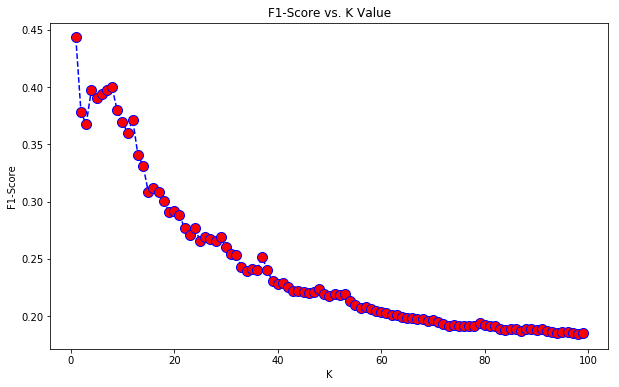

Best K value =  1


In [349]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [350]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47433333333333333
F1-Score =  0.44338184212892234
[[219 630  51]
 [120 866 114]
 [ 43 619 338]]


In [351]:
from sklearn.tree import DecisionTreeClassifier 


In [352]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [353]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [354]:
y_pred = dtree_model.predict(X_test)

In [355]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5106666666666667
F1-Score =  0.5060649523554165
[[330 461 109]
 [188 686 226]
 [ 56 428 516]]


In [356]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [357]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [358]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49633333333333335
F1-Score =  0.4824337500582063
[[671 156  73]
 [611 241 248]
 [273 150 577]]


In [359]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.557
F1-Score =  0.5622791808986476
[[474 371  55]
 [280 646 174]
 [ 68 381 551]]


In [360]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [361]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [362]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.55
F1-Score =  0.5527204923837091
[[428 415  57]
 [245 697 158]
 [ 61 414 525]]


In [363]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [364]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

8.117975346247356  minutes


In [365]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.53
F1-Score =  0.529407738571043
[[373 440  87]
 [216 681 203]
 [ 54 410 536]]


# One Hot Binarizer

In [366]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [367]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [368]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.53
F1-Score =  0.5305722045872107
[[407 410  83]
 [237 678 185]
 [ 81 414 505]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

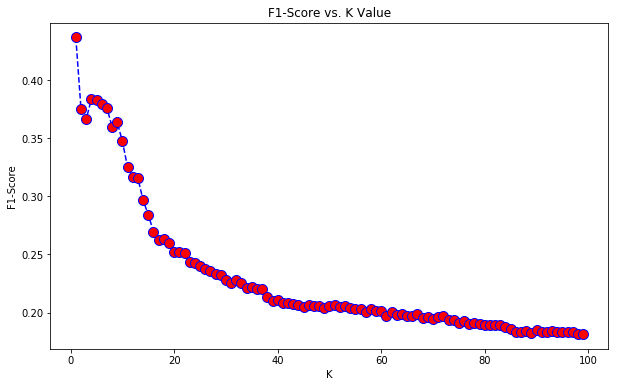

Best K value =  1


In [369]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [370]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4696666666666667
F1-Score =  0.4366908989740778
[[219 636  45]
 [121 874 105]
 [ 44 640 316]]


In [371]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5183333333333333
F1-Score =  0.514733566912112
[[343 451 106]
 [195 692 213]
 [ 51 429 520]]


In [372]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.497
F1-Score =  0.482876913348131
[[672 155  73]
 [612 240 248]
 [273 148 579]]


In [373]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5596666666666666
F1-Score =  0.5646766046658486
[[469 375  56]
 [274 654 172]
 [ 65 379 556]]


In [374]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.549
F1-Score =  0.5514701544004007
[[431 413  56]
 [244 708 148]
 [ 60 432 508]]


In [375]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

8.664144766330718  minutes
Accuracy Score =  0.5283333333333333
F1-Score =  0.5277069800107278
[[372 441  87]
 [215 680 205]
 [ 55 412 533]]


# Tf-IDF Vectorizer

In [376]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2),min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [377]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [378]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5463333333333333
F1-Score =  0.5498194874386656
[[449 396  55]
 [264 688 148]
 [ 68 430 502]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

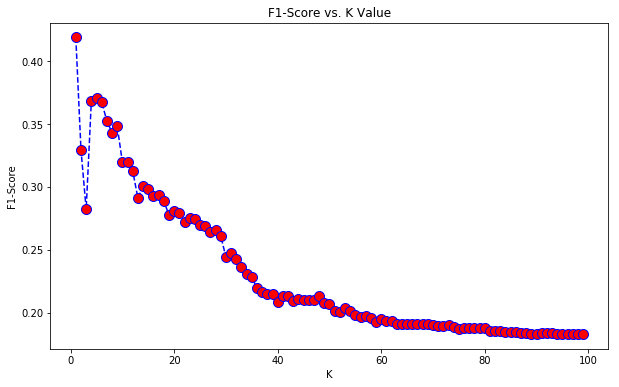

Best K value =  1


In [379]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [380]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4513333333333333
F1-Score =  0.41882609593807035
[[213 641  46]
 [128 843 129]
 [ 41 661 298]]


In [381]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5113333333333333
F1-Score =  0.50013658087743
[[304 517  79]
 [170 785 145]
 [ 49 506 445]]


In [382]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48966666666666664
F1-Score =  0.4813938704153721
[[628 185  87]
 [576 276 248]
 [256 179 565]]


In [383]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.558
F1-Score =  0.5602796450133959
[[417 420  63]
 [212 697 191]
 [ 46 394 560]]


In [384]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.5496666666666666
F1-Score =  0.5528728129675254
[[437 408  55]
 [254 690 156]
 [ 66 412 522]]


In [385]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

7.480166482925415  minutes
Accuracy Score =  0.5306666666666666
F1-Score =  0.5265291918783684
[[342 484  74]
 [183 734 183]
 [ 47 437 516]]


# Count Vectorizer

In [386]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df = 3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [387]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [388]:
X_train.shape

(14000, 5599)

In [389]:
X_test.shape

(3000, 5599)

In [390]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.527
F1-Score =  0.5214778159224264
[[377 477  46]
 [208 785 107]
 [ 70 511 419]]


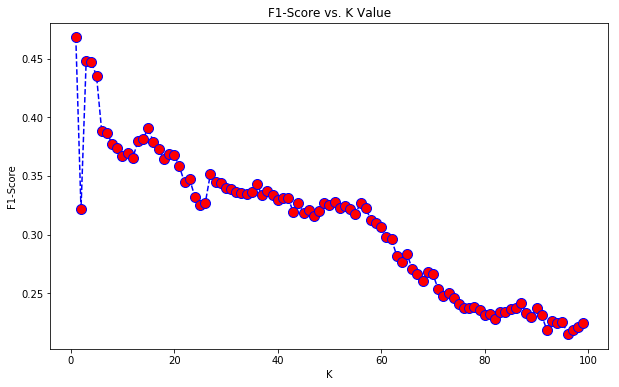

Best K value =  1


In [391]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [392]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48433333333333334
F1-Score =  0.46795994873702274
[[272 566  62]
 [164 792 144]
 [ 60 551 389]]


In [393]:
from sklearn.tree import DecisionTreeClassifier 


In [394]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [395]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [396]:
y_pred = dtree_model.predict(X_test)

In [397]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5096666666666667
F1-Score =  0.5048891234142519
[[356 480  64]
 [207 742 151]
 [ 66 503 431]]


In [398]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [399]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [400]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4676666666666667
F1-Score =  0.43429169479591573
[[742  93  65]
 [764 126 210]
 [387  78 535]]


In [401]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5553333333333333
F1-Score =  0.5560648822835933
[[416 445  39]
 [226 756 118]
 [ 60 446 494]]


In [402]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [403]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [404]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5403333333333333
F1-Score =  0.5396089994757617
[[391 456  53]
 [202 742 156]
 [ 56 456 488]]


In [405]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [406]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

3.30012123187383  minutes


In [407]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5263333333333333
F1-Score =  0.5264425292126633
[[381 446  73]
 [229 686 185]
 [ 63 425 512]]


# One Hot Binarizer

In [408]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [409]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [410]:
X_train.shape

(14000, 5599)

In [411]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5326666666666666
F1-Score =  0.5275420082180363
[[380 473  47]
 [204 788 108]
 [ 69 501 430]]


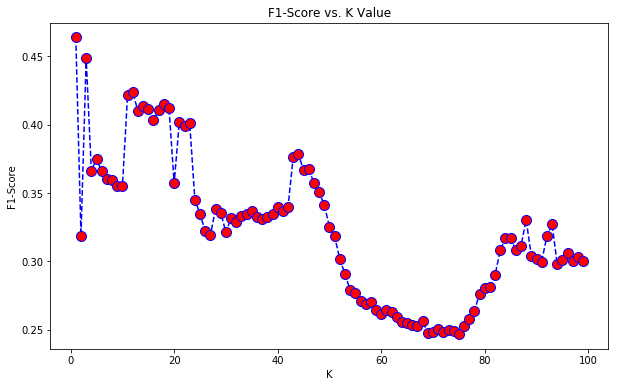

Best K value =  1


In [412]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [413]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4816666666666667
F1-Score =  0.4639050176436683
[[274 569  57]
 [166 803 131]
 [ 63 569 368]]


In [414]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.508
F1-Score =  0.503158726225153
[[352 480  68]
 [213 736 151]
 [ 69 495 436]]


In [415]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4663333333333333
F1-Score =  0.43154240538175154
[[743  93  64]
 [764 120 216]
 [390  74 536]]


In [416]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.555
F1-Score =  0.5555130598686142
[[410 450  40]
 [220 755 125]
 [ 59 441 500]]


In [417]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.542
F1-Score =  0.5406904702747882
[[394 452  54]
 [202 753 145]
 [ 58 463 479]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [418]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.1731809178988137  minutes
Accuracy Score =  0.5253333333333333
F1-Score =  0.5259350964687428
[[385 443  72]
 [231 681 188]
 [ 62 428 510]]


# Tf-IDF Vectorizer

In [419]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df = 3)
features2 = tfidf.fit_transform(df['Tweet'])

In [420]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [421]:
X_train.shape

(14000, 5599)

In [422]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.538
F1-Score =  0.5370292654427372
[[405 456  39]
 [239 757 104]
 [ 70 478 452]]


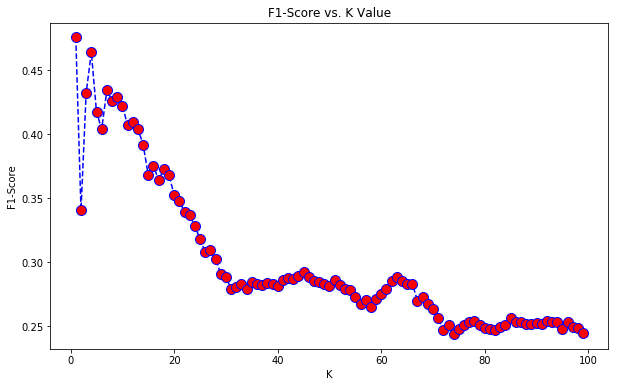

Best K value =  1


In [423]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [424]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48533333333333334
F1-Score =  0.4753897564162188
[[323 509  68]
 [174 754 172]
 [ 69 552 379]]


In [425]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.512
F1-Score =  0.5072796476592195
[[334 480  86]
 [192 708 200]
 [ 66 440 494]]


In [426]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47
F1-Score =  0.443079687457947
[[712 114  74]
 [728 151 221]
 [346 107 547]]


In [427]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5546666666666666
F1-Score =  0.5515160141581489
[[372 485  43]
 [182 792 126]
 [ 47 453 500]]


In [428]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5496666666666666
F1-Score =  0.54960391493498
[[407 446  47]
 [217 753 130]
 [ 58 453 489]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [429]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.9101450006167093  minutes
Accuracy Score =  0.5366666666666666
F1-Score =  0.5356102873996605
[[377 455  68]
 [206 715 179]
 [ 60 422 518]]


# Count Vectorizer

In [430]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df = 5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [431]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [432]:
X_train.shape

(14000, 1949)

In [433]:
X_test.shape

(3000, 1949)

In [434]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5136666666666667
F1-Score =  0.501602045674736
[[320 561  19]
 [190 839  71]
 [ 46 572 382]]


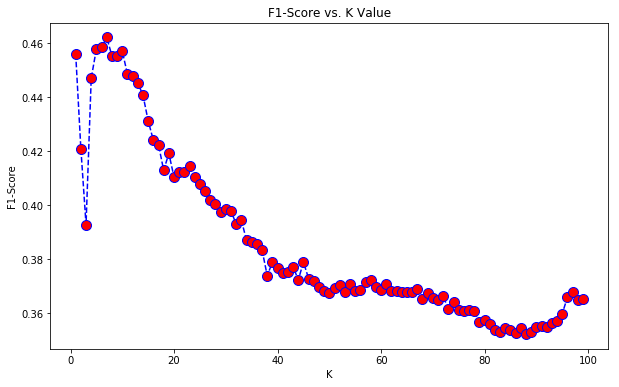

Best K value =  7


In [435]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [436]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4766666666666667
F1-Score =  0.4621651761638832
[[330 539  31]
 [245 781  74]
 [112 569 319]]


In [437]:
from sklearn.tree import DecisionTreeClassifier 


In [438]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [439]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [440]:
y_pred = dtree_model.predict(X_test)

In [441]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5033333333333333
F1-Score =  0.49251399209122004
[[301 543  56]
 [186 783 131]
 [ 54 520 426]]


In [442]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [443]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [444]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.441
F1-Score =  0.38590304356580885
[[834  31  35]
 [919  55 126]
 [536  30 434]]


In [445]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5233333333333333
F1-Score =  0.5129263334138169
[[326 548  26]
 [184 837  79]
 [ 42 551 407]]


In [446]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [447]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [448]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.521
F1-Score =  0.5116663399097804
[[320 541  39]
 [178 811 111]
 [ 44 524 432]]


In [449]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [450]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

1.5069733301798502  minutes


In [451]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5116666666666667
F1-Score =  0.503657059597172
[[302 537  61]
 [185 754 161]
 [ 45 476 479]]


# One Hot Binarizer

In [452]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [453]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [454]:
X_train.shape

(14000, 1949)

In [455]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.514
F1-Score =  0.5008815006043935
[[319 562  19]
 [185 848  67]
 [ 44 581 375]]


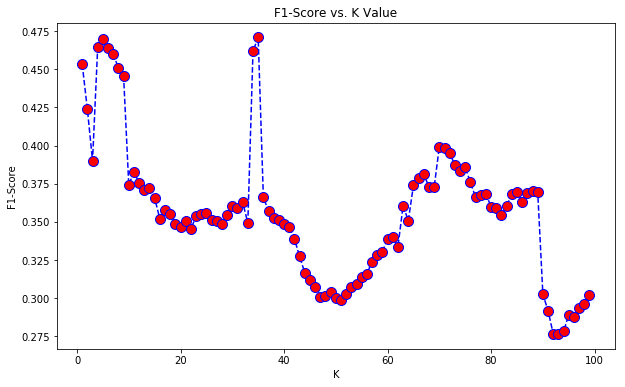

Best K value =  35


In [456]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [457]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.475
F1-Score =  0.4708652695180706
[[399 471  30]
 [344 676  80]
 [226 424 350]]


In [458]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.505
F1-Score =  0.4941888429577849
[[302 544  54]
 [184 787 129]
 [ 52 522 426]]


In [459]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.437
F1-Score =  0.37990916959155463
[[834  31  35]
 [926  48 126]
 [545  26 429]]


In [460]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5293333333333333
F1-Score =  0.5190307153926813
[[324 547  29]
 [177 841  82]
 [ 41 536 423]]


In [461]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.524
F1-Score =  0.5143258701921994
[[323 540  37]
 [169 820 111]
 [ 44 527 429]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [462]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

1.5170740286509197  minutes
Accuracy Score =  0.511
F1-Score =  0.5034270580794772
[[306 533  61]
 [188 752 160]
 [ 46 479 475]]


# Tf-IDF Vectorizer

In [463]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 2), min_df = 5)
features2 = tfidf.fit_transform(df['Tweet'])

In [464]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [465]:
X_train.shape

(14000, 1949)

In [466]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5143333333333333
F1-Score =  0.5032640391561564
[[335 543  22]
 [198 831  71]
 [ 53 570 377]]


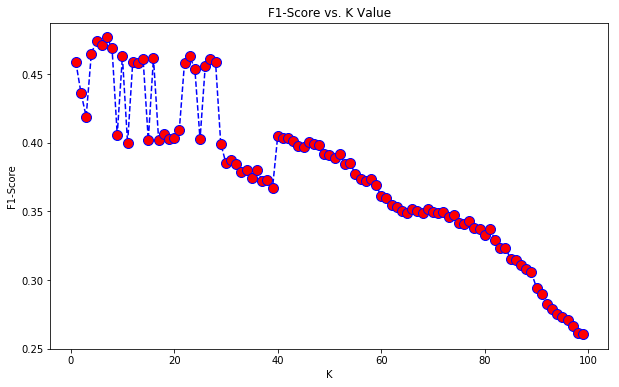

Best K value =  7


In [467]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [468]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49333333333333335
F1-Score =  0.4768018618362928
[[305 560  35]
 [184 822  94]
 [ 84 563 353]]


In [469]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5016666666666667
F1-Score =  0.4901807809356868
[[297 553  50]
 [178 788 134]
 [ 54 526 420]]


In [470]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4573333333333333
F1-Score =  0.4106241054633177
[[811  44  45]
 [891  77 132]
 [476  40 484]]


In [471]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5273333333333333
F1-Score =  0.5140259669823614
[[304 568  28]
 [157 859  84]
 [ 34 547 419]]


In [472]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5266666666666666
F1-Score =  0.5182749094128841
[[325 540  35]
 [177 814 109]
 [ 40 519 441]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [473]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

1.5897509495417277  minutes
Accuracy Score =  0.5123333333333333
F1-Score =  0.5043551508844019
[[303 537  60]
 [186 755 159]
 [ 47 474 479]]


# Trigrams

# Count Vectorizer

In [474]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df=1)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [475]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [476]:
X_train.shape

(14000, 148100)

In [477]:
X_test.shape

(3000, 148100)

In [478]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.422
F1-Score =  0.3099242739474639
[[  43  851    6]
 [  13 1043   44]
 [   4  816  180]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

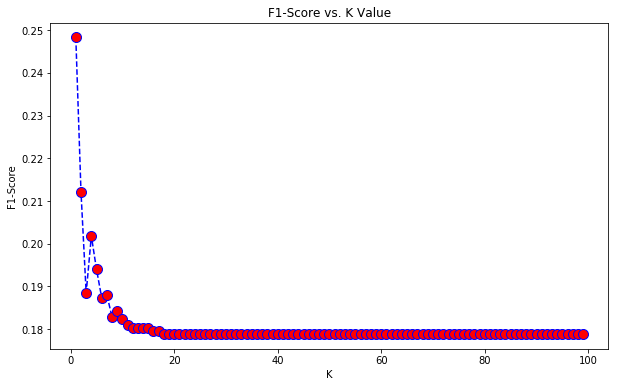

Best K value =  1


In [479]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [480]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3923333333333333
F1-Score =  0.24827558861372254
[[  35  863    2]
 [  11 1071   18]
 [   3  926   71]]


In [481]:
from sklearn.tree import DecisionTreeClassifier 


In [482]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [483]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [484]:
y_pred = dtree_model.predict(X_test)

In [485]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.41533333333333333
F1-Score =  0.29852676935815065
[[  46  847    7]
 [  15 1048   37]
 [   6  842  152]]


In [486]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [487]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [488]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.38366666666666666
F1-Score =  0.3243703126564475
[[832  48  20]
 [970  68  62]
 [702  47 251]]


In [489]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4246666666666667
F1-Score =  0.40157591014358407
[[747 134  19]
 [762 274  64]
 [527 220 253]]


In [490]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [491]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [492]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.427
F1-Score =  0.31938391848474224
[[  47  846    7]
 [  17 1040   43]
 [   5  801  194]]


In [493]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [494]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

113.09611212015152  minutes


In [495]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.416
F1-Score =  0.2933887950566972
[[  36  862    2]
 [  12 1061   27]
 [   4  845  151]]


# One Hot Binarizer

In [496]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [497]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [498]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.42133333333333334
F1-Score =  0.3091905858054391
[[  43  851    6]
 [  13 1042   45]
 [   3  818  179]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

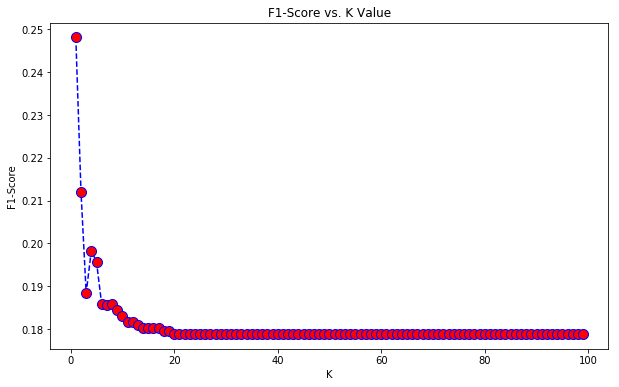

Best K value =  1


In [499]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [500]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.392
F1-Score =  0.24809344429597593
[[  35  863    2]
 [  11 1070   19]
 [   2  927   71]]


In [501]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4176666666666667
F1-Score =  0.30174246504472496
[[  46  850    4]
 [  17 1050   33]
 [   6  837  157]]


In [502]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.38366666666666666
F1-Score =  0.3243703126564475
[[832  48  20]
 [970  68  62]
 [702  47 251]]


In [503]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43
F1-Score =  0.41465282013409616
[[688 193  19]
 [686 348  66]
 [476 270 254]]


In [504]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.4266666666666667
F1-Score =  0.3186647405729479
[[  46  847    7]
 [  17 1040   43]
 [   4  802  194]]


In [505]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

108.91149488687515  minutes
Accuracy Score =  0.4156666666666667
F1-Score =  0.2930075477982966
[[  37  861    2]
 [  12 1061   27]
 [   3  848  149]]


# Tf-IDF Vectorizer

In [506]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(ngram_range=(3, 3), min_df=1)
features2 = tfidf.fit_transform(df['Tweet'])

In [507]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [508]:
X_train.shape

(14000, 148100)

In [509]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.424
F1-Score =  0.31452340325367034
[[  53  844    3]
 [  16 1045   39]
 [   5  821  174]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

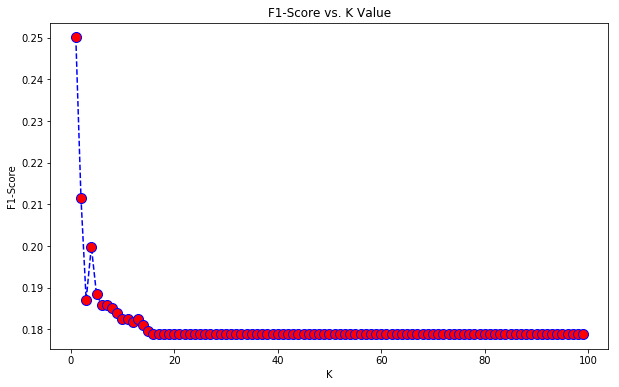

Best K value =  1


In [510]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [511]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.393
F1-Score =  0.25006504630897536
[[  36  862    2]
 [  11 1070   19]
 [   3  924   73]]


In [512]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4206666666666667
F1-Score =  0.30449198939258226
[[  47  848    5]
 [  13 1056   31]
 [   4  837  159]]


In [513]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.38333333333333336
F1-Score =  0.3243117283681378
[[832  49  19]
 [970  70  60]
 [702  50 248]]


In [514]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.42833333333333334
F1-Score =  0.31838454006590555
[[  41  852    7]
 [  12 1045   43]
 [   3  798  199]]


In [515]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.422
F1-Score =  0.30789305381230586
[[  42  854    4]
 [  12 1049   39]
 [   4  821  175]]


In [516]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

113.3902890165647  minutes
Accuracy Score =  0.416
F1-Score =  0.29370544577208396
[[  36  861    3]
 [  12 1060   28]
 [   4  844  152]]


# Count Vectorizer

In [517]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [518]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### ---------------------------------------------------------------------------------------------------------------------------------------

In [519]:
X_train.shape

(14000, 8729)

In [520]:
X_test.shape

(3000, 8729)

In [521]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.368
F1-Score =  0.3035627131874969
[[834  53  13]
 [972  79  49]
 [733  76 191]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

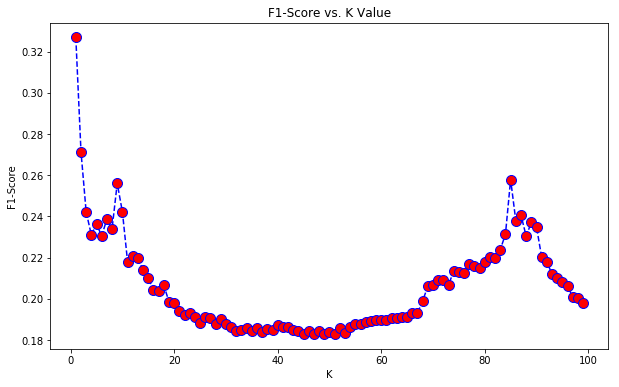

Best K value =  1


In [522]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [523]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.42333333333333334
F1-Score =  0.3268670311669963
[[  73  810   17]
 [  37 1013   50]
 [   8  808  184]]


In [524]:
from sklearn.tree import DecisionTreeClassifier 


In [525]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [526]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [527]:
y_pred = dtree_model.predict(X_test)

In [528]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.36766666666666664
F1-Score =  0.3012462301702553
[[836  48  16]
 [980  65  55]
 [735  63 202]]


In [529]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [530]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [531]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.37066666666666664
F1-Score =  0.3083359895022782
[[832  53  15]
 [970  79  51]
 [702  97 201]]


In [532]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43633333333333335
F1-Score =  0.3599052939714009
[[ 97 786  17]
 [ 68 977  55]
 [ 48 717 235]]


In [533]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [534]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [535]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43933333333333335
F1-Score =  0.3561752564929628
[[ 83 799  18]
 [ 43 997  60]
 [ 12 750 238]]


In [536]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [537]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

3.940105887254079  minutes


In [538]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.37233333333333335
F1-Score =  0.31174967996673913
[[824  55  21]
 [965  74  61]
 [712  69 219]]


# One Hot Binarizer

In [539]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [540]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [541]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.36566666666666664
F1-Score =  0.2999293734228184
[[834  53  13]
 [976  74  50]
 [733  78 189]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

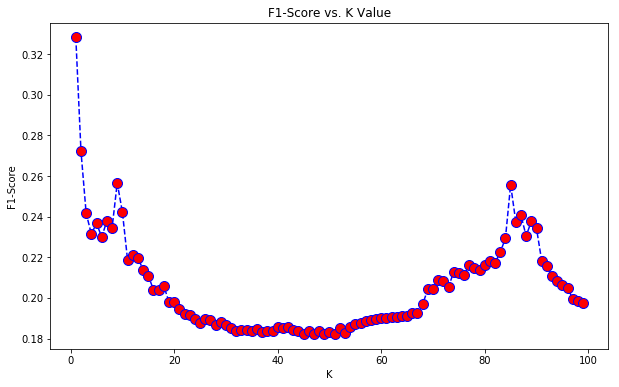

Best K value =  1


In [542]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [543]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4236666666666667
F1-Score =  0.3281092941052865
[[  74  809   17]
 [  37 1011   52]
 [   8  806  186]]


In [544]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.36966666666666664
F1-Score =  0.30366851603594575
[[838  45  17]
 [980  67  53]
 [733  63 204]]


In [545]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.37066666666666664
F1-Score =  0.3083359895022782
[[832  53  15]
 [970  79  51]
 [702  97 201]]


In [546]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43566666666666665
F1-Score =  0.35921049546772027
[[ 97 786  17]
 [ 68 976  56]
 [ 47 719 234]]


In [547]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43866666666666665
F1-Score =  0.35562149724083764
[[ 84 798  18]
 [ 42 996  62]
 [ 12 752 236]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [548]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.978761013348897  minutes
Accuracy Score =  0.37166666666666665
F1-Score =  0.3107236429449231
[[824  55  21]
 [965  73  62]
 [712  70 218]]


# Tf-IDF Vectorizer

In [549]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3),min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [550]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [551]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43566666666666665
F1-Score =  0.3488899503147229
[[  87  797   16]
 [  43 1008   49]
 [  14  774  212]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

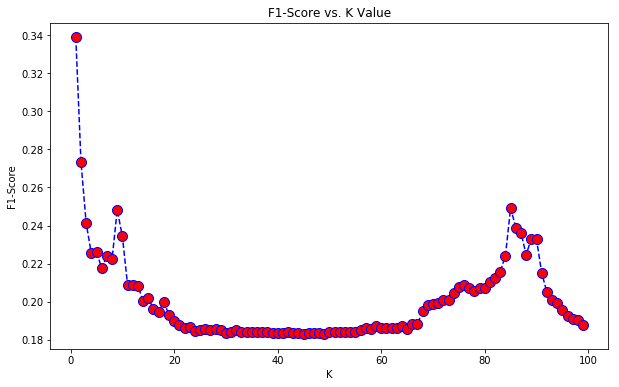

Best K value =  1


In [552]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [553]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.42866666666666664
F1-Score =  0.3386950142227609
[[  79  802   19]
 [  43 1003   54]
 [   9  787  204]]


In [554]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.36933333333333335
F1-Score =  0.3027152631752838
[[839  45  16]
 [981  65  54]
 [736  60 204]]


In [555]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.37333333333333335
F1-Score =  0.3123841862013572
[[831  54  15]
 [970  79  51]
 [702  88 210]]


In [556]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.438
F1-Score =  0.35412812167912494
[[ 85 797  18]
 [ 42 999  59]
 [ 10 760 230]]


In [557]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.441
F1-Score =  0.3585939588131391
[[ 84 798  18]
 [ 41 997  62]
 [ 10 748 242]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [558]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.8066801031430564  minutes
Accuracy Score =  0.37333333333333335
F1-Score =  0.31293531313878203
[[824  55  21]
 [964  73  63]
 [713  64 223]]


# Count Vectorizer

In [559]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df = 3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [560]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [561]:
X_train.shape

(14000, 1392)

In [562]:
X_test.shape

(3000, 1392)

In [563]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.348
F1-Score =  0.25192230543131483
[[ 886   11    3]
 [1047   24   29]
 [ 818   48  134]]


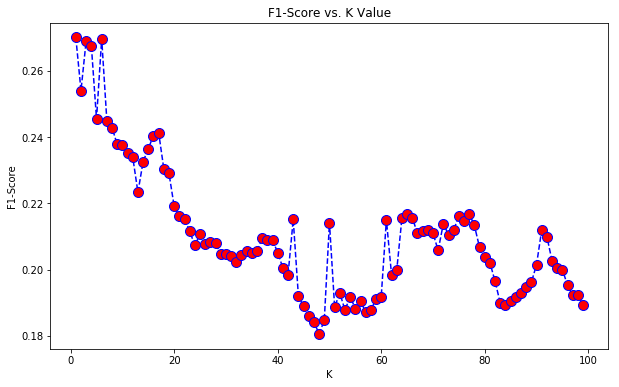

Best K value =  1


In [564]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [565]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.40166666666666667
F1-Score =  0.2700220091826798
[[  20  871    9]
 [  12 1052   36]
 [   5  862  133]]


In [566]:
from sklearn.tree import DecisionTreeClassifier 


In [567]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [568]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [569]:
y_pred = dtree_model.predict(X_test)

In [570]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3506666666666667
F1-Score =  0.25636321418909275
[[ 882   11    7]
 [1041   18   41]
 [ 816   32  152]]


In [571]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [572]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [573]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3473333333333333
F1-Score =  0.25043232976157126
[[ 887   10    3]
 [1054   21   25]
 [ 816   50  134]]


In [574]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4046666666666667
F1-Score =  0.28557267577707024
[[  36  860    4]
 [  38 1037   25]
 [  56  803  141]]


In [575]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [576]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [577]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4106666666666667
F1-Score =  0.2882241253235914
[[  28  865    7]
 [  16 1047   37]
 [   9  834  157]]


In [578]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [579]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

0.5837479035059611  minutes


In [580]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.35133333333333333
F1-Score =  0.2589971512491967
[[ 878   12   10]
 [1041   19   40]
 [ 807   36  157]]


# One Hot Binarizer

In [581]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [582]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [583]:
X_train.shape

(14000, 1392)

In [584]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3486666666666667
F1-Score =  0.25268985735360977
[[ 887   10    3]
 [1047   25   28]
 [ 818   48  134]]


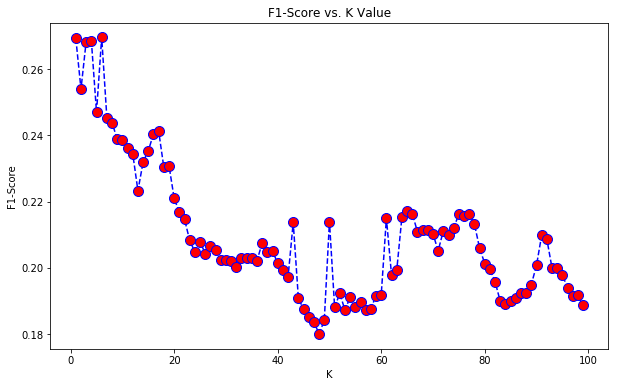

Best K value =  6


In [585]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [586]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39966666666666667
F1-Score =  0.269588451374406
[[  25  869    6]
 [  22 1050   28]
 [  31  845  124]]


In [587]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3506666666666667
F1-Score =  0.25636321418909275
[[ 882   11    7]
 [1041   18   41]
 [ 816   32  152]]


In [588]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3466666666666667
F1-Score =  0.24949334489562225
[[ 887   10    3]
 [1054   22   24]
 [ 816   53  131]]


In [589]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4046666666666667
F1-Score =  0.2855267104305493
[[  36  860    4]
 [  37 1037   26]
 [  56  803  141]]


In [590]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4096666666666667
F1-Score =  0.28699176688241534
[[  28  865    7]
 [  16 1046   38]
 [  10  835  155]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [591]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

0.5723748366038005  minutes
Accuracy Score =  0.351
F1-Score =  0.2585069709343157
[[ 878   12   10]
 [1041   19   40]
 [ 807   37  156]]


# Tf-IDF Vectorizer

In [592]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df = 3)
features2 = tfidf.fit_transform(df['Tweet'])

In [593]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [594]:
X_train.shape

(14000, 1392)

In [595]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.35
F1-Score =  0.25637375926702916
[[ 884   12    4]
 [1045   29   26]
 [ 811   52  137]]


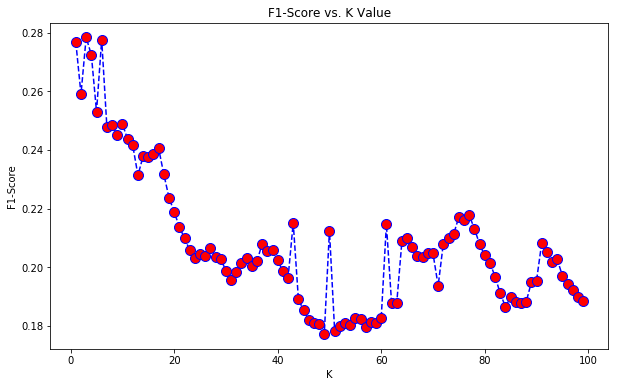

Best K value =  3


In [596]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [597]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4026666666666667
F1-Score =  0.27836039960551645
[[  34  864    2]
 [  35 1046   19]
 [  45  827  128]]


In [598]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.35133333333333333
F1-Score =  0.2575280135700266
[[ 882   11    7]
 [1041   19   40]
 [ 815   32  153]]


In [599]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.348
F1-Score =  0.2520402732277317
[[ 886   11    3]
 [1054   22   24]
 [ 813   51  136]]


In [600]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4053333333333333
F1-Score =  0.28532752065373695
[[  35  860    5]
 [  35 1040   25]
 [  56  803  141]]


In [601]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.41233333333333333
F1-Score =  0.2898009266952603
[[  28  865    7]
 [  15 1050   35]
 [   8  833  159]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [602]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

0.6155528664588928  minutes
Accuracy Score =  0.352
F1-Score =  0.26004562725370844
[[ 878   12   10]
 [1041   19   40]
 [ 805   36  159]]


# Count Vectorizer

In [603]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df = 5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [604]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [605]:
X_train.shape

(14000, 431)

In [606]:
X_test.shape

(3000, 431)

In [607]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3353333333333333
F1-Score =  0.22443477166688153
[[ 896    3    1]
 [1074    6   20]
 [ 881   15  104]]


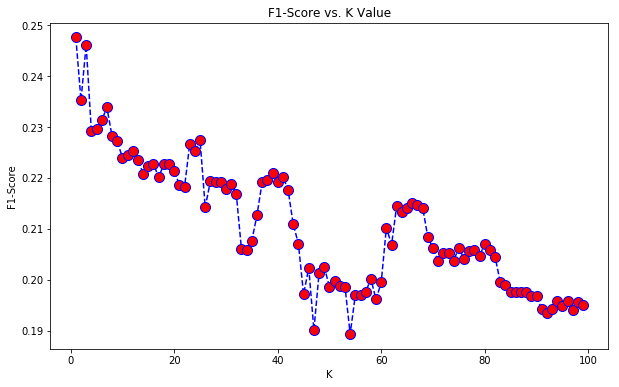

Best K value =  1


In [608]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [609]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39666666666666667
F1-Score =  0.2475799374600304
[[   7  890    3]
 [   5 1081   14]
 [   3  895  102]]


In [610]:
from sklearn.tree import DecisionTreeClassifier 


In [611]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [612]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [613]:
y_pred = dtree_model.predict(X_test)

In [614]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.337
F1-Score =  0.22810766783013783
[[ 894    3    3]
 [1070    6   24]
 [ 872   17  111]]


In [615]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [616]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [617]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.33366666666666667
F1-Score =  0.22124386067765742
[[ 897    1    2]
 [1083    4   13]
 [ 879   21  100]]


In [618]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39566666666666667
F1-Score =  0.25542907405583465
[[  16  882    2]
 [  21 1066   13]
 [  38  857  105]]


In [619]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [620]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [621]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.399
F1-Score =  0.25603796857294253
[[  11  885    4]
 [   4 1072   24]
 [   6  880  114]]


In [622]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [623]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

0.23812843163808187  minutes


In [624]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.33666666666666667
F1-Score =  0.22870700365713628
[[ 891    3    6]
 [1070    6   24]
 [ 869   18  113]]


# One Hot Binarizer

In [625]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [626]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [627]:
X_train.shape

(14000, 431)

In [628]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.33466666666666667
F1-Score =  0.22342139400970598
[[ 896    3    1]
 [1075    7   18]
 [ 882   17  101]]


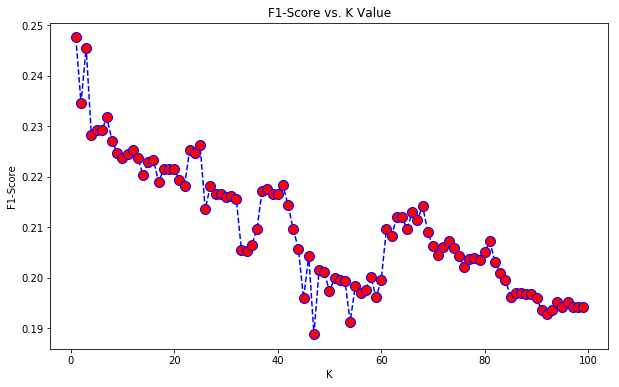

Best K value =  1


In [629]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [630]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39666666666666667
F1-Score =  0.2475799374600304
[[   7  890    3]
 [   5 1081   14]
 [   3  895  102]]


In [631]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.337
F1-Score =  0.22810766783013783
[[ 894    3    3]
 [1070    6   24]
 [ 872   17  111]]


In [632]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.33266666666666667
F1-Score =  0.21947667446461874
[[ 897    1    2]
 [1084    3   13]
 [ 880   22   98]]


In [633]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39466666666666667
F1-Score =  0.2542759275225174
[[  17  881    2]
 [  21 1065   14]
 [  40  858  102]]


In [634]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3983333333333333
F1-Score =  0.25532230408587614
[[  11  885    4]
 [   4 1071   25]
 [   7  880  113]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [635]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

0.22663373549779256  minutes
Accuracy Score =  0.33666666666666667
F1-Score =  0.22870700365713628
[[ 891    3    6]
 [1070    6   24]
 [ 869   18  113]]


# Tf-IDF Vectorizer

In [636]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(3, 3), min_df = 5)
features2 = tfidf.fit_transform(df['Tweet'])

In [637]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [638]:
X_train.shape

(14000, 431)

In [639]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.337
F1-Score =  0.22749931971566528
[[ 896    2    2]
 [1073    9   18]
 [ 878   16  106]]


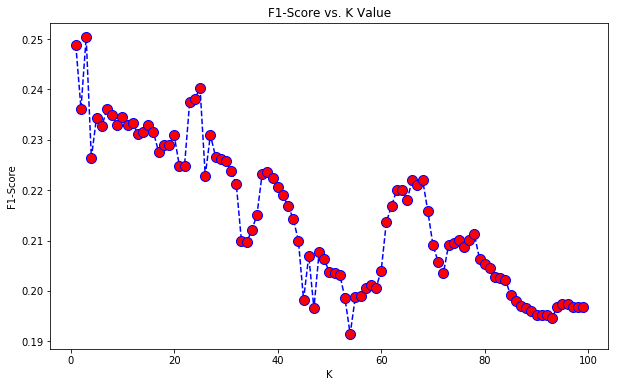

Best K value =  3


In [640]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [641]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39566666666666667
F1-Score =  0.2502956949235116
[[  10  887    3]
 [  11 1073   16]
 [  13  883  104]]


In [642]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.337
F1-Score =  0.22814722763651862
[[ 894    3    3]
 [1070    6   24]
 [ 871   18  111]]


In [643]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.332
F1-Score =  0.21884370847468268
[[ 896    1    3]
 [1082    3   15]
 [ 877   26   97]]


In [644]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.3953333333333333
F1-Score =  0.25442574848328386
[[  16  882    2]
 [  20 1067   13]
 [  39  858  103]]


In [645]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.399
F1-Score =  0.2556470067611016
[[  11  885    4]
 [   4 1073   23]
 [   6  881  113]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [646]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

0.242643932501475  minutes
Accuracy Score =  0.33666666666666667
F1-Score =  0.22878615043188955
[[ 891    3    6]
 [1070    6   24]
 [ 867   20  113]]


# Bi-Trigrams

# Count Vectorizer

In [647]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df=1)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [648]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [649]:
X_train.shape

(14000, 283672)

In [650]:
X_test.shape

(3000, 283672)

In [651]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5033333333333333
F1-Score =  0.45498763187904184
[[164 726  10]
 [ 41 988  71]
 [ 12 630 358]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

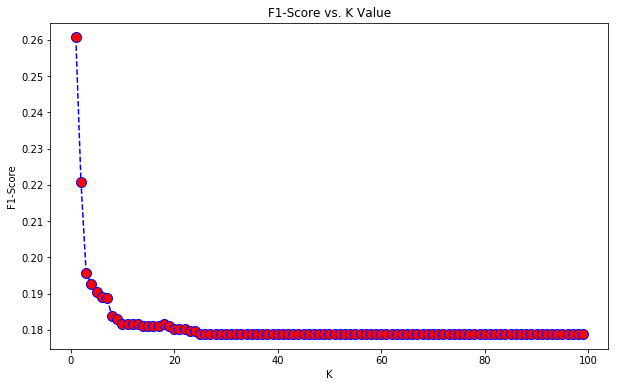

Best K value =  1


In [652]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [653]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39766666666666667
F1-Score =  0.2606762037464888
[[  39  859    2]
 [  12 1066   22]
 [   4  908   88]]


In [654]:
from sklearn.tree import DecisionTreeClassifier 


In [655]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [656]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [657]:
y_pred = dtree_model.predict(X_test)

In [658]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5176666666666667
F1-Score =  0.49568872932833474
[[261 610  29]
 [118 895  87]
 [ 28 575 397]]


In [659]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

In [660]:
# gnb.fit(X_train.toarray(), y_train)

In [661]:
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [662]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [663]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [664]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [665]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.532
F1-Score =  0.5064546369879892
[[246 638  16]
 [ 82 938  80]
 [ 17 571 412]]


In [666]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [667]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

167.83270151615142  minutes


In [668]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49733333333333335
F1-Score =  0.4412164682701342
[[ 150  741    9]
 [  33 1013   54]
 [   9  662  329]]


# One Hot Binarizer

In [669]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [670]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [671]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5023333333333333
F1-Score =  0.4535088102740021
[[165 723  12]
 [ 41 990  69]
 [ 12 636 352]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

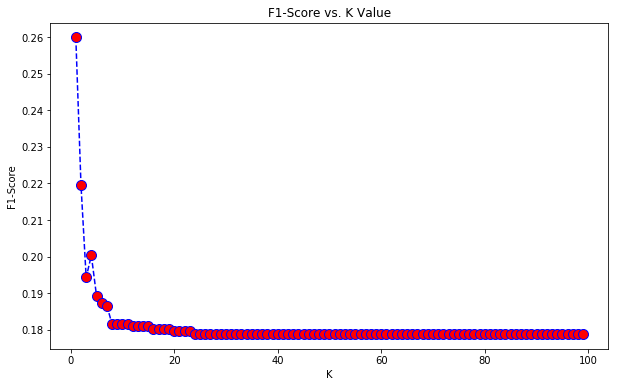

Best K value =  1


In [672]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [673]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.397
F1-Score =  0.2598898272486173
[[  39  859    2]
 [  12 1065   23]
 [   3  910   87]]


In [674]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5193333333333333
F1-Score =  0.4982593624776066
[[242 614  44]
 [112 857 131]
 [ 31 510 459]]


In [675]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train.toarray(), y_train)
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [676]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [677]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.533
F1-Score =  0.5071311036357221
[[245 638  17]
 [ 82 941  77]
 [ 16 571 413]]


In [678]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

146.36832214991253  minutes
Accuracy Score =  0.49766666666666665
F1-Score =  0.4412732874760899
[[ 149  741   10]
 [  33 1014   53]
 [   8  662  330]]


# Tf-IDF Vectorizer

In [679]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(ngram_range=(2, 3), min_df=1)
features2 = tfidf.fit_transform(df['Tweet'])

In [680]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [681]:
X_train.shape

(14000, 283672)

In [682]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.518
F1-Score =  0.4900683225257818
[[256 635   9]
 [ 94 946  60]
 [ 21 627 352]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

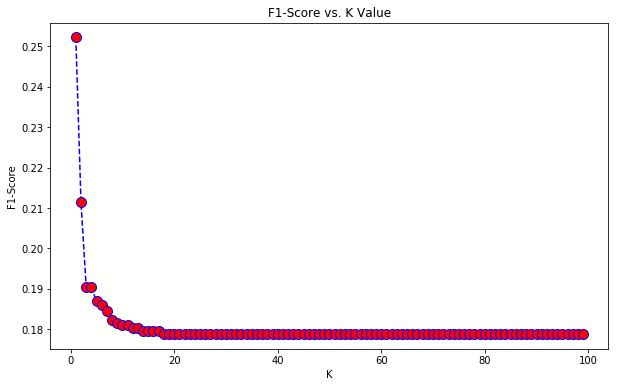

Best K value =  1


In [683]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [684]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.39366666666666666
F1-Score =  0.2521829891183655
[[  36  862    2]
 [  11 1068   21]
 [   3  920   77]]


In [685]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49566666666666664
F1-Score =  0.47104115483749265
[[248 617  35]
 [127 875  98]
 [ 34 602 364]]


In [686]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train.toarray(), y_train)
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [687]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [688]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.5106666666666667
F1-Score =  0.47062035586743667
[[201 691   8]
 [ 56 981  63]
 [ 12 638 350]]


In [689]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

143.78361730178196  minutes
Accuracy Score =  0.49633333333333335
F1-Score =  0.442350302711401
[[ 162  730    8]
 [  37 1010   53]
 [  12  671  317]]


# Count Vectorizer

In [690]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [691]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### ---------------------------------------------------------------------------------------------------------------------------------------

In [692]:
X_train.shape

(14000, 26040)

In [693]:
X_test.shape

(3000, 26040)

In [694]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5243333333333333
F1-Score =  0.5251266620956896
[[399 418  83]
 [246 668 186]
 [ 77 417 506]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

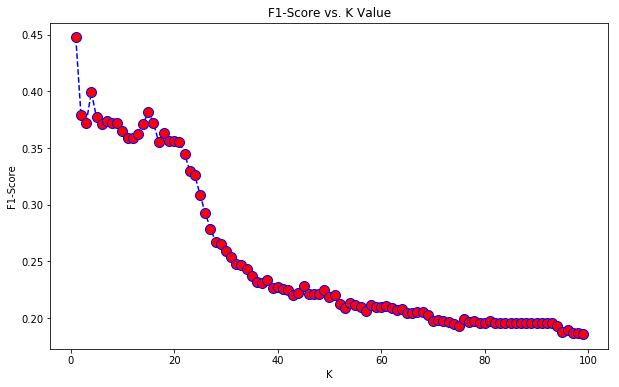

Best K value =  1


In [695]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [696]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.477
F1-Score =  0.44756130118957566
[[220 624  56]
 [126 859 115]
 [ 41 607 352]]


In [697]:
from sklearn.tree import DecisionTreeClassifier 


In [698]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [699]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [700]:
y_pred = dtree_model.predict(X_test)

In [701]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5153333333333333
F1-Score =  0.5124813383850574
[[342 464  94]
 [193 683 224]
 [ 52 427 521]]


In [702]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [703]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [704]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.479
F1-Score =  0.4757638886007154
[[659 186  55]
 [608 335 157]
 [271 286 443]]


In [705]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5516666666666666
F1-Score =  0.5570070648942411
[[477 370  53]
 [291 647 162]
 [ 74 395 531]]


In [706]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [707]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [708]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5473333333333333
F1-Score =  0.5493941767801879
[[421 418  61]
 [241 701 158]
 [ 62 418 520]]


In [709]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [710]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

10.853322287400564  minutes


In [711]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5273333333333333
F1-Score =  0.5263801617696432
[[366 450  84]
 [217 686 197]
 [ 52 418 530]]


# One Hot Binarizer

In [712]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [713]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [714]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.527
F1-Score =  0.527948749974303
[[403 418  79]
 [240 673 187]
 [ 76 419 505]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

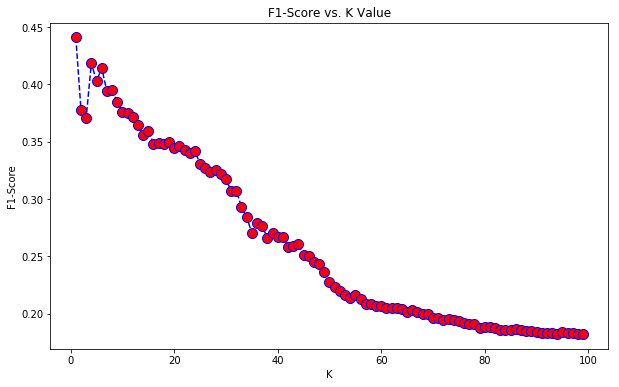

Best K value =  1


In [715]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [716]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4723333333333333
F1-Score =  0.440959349906392
[[221 630  49]
 [127 868 105]
 [ 44 628 328]]


In [717]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5123333333333333
F1-Score =  0.507795483799324
[[330 465 105]
 [195 691 214]
 [ 52 432 516]]


In [718]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.478
F1-Score =  0.47466977738908495
[[660 185  55]
 [608 337 155]
 [271 292 437]]


In [719]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.555
F1-Score =  0.5601375633134926
[[474 371  55]
 [281 650 169]
 [ 71 388 541]]


In [720]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.5466666666666666
F1-Score =  0.5483673024442881
[[420 420  60]
 [243 710 147]
 [ 63 427 510]]


In [721]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

10.929691751797995  minutes
Accuracy Score =  0.5273333333333333
F1-Score =  0.5266063972467183
[[370 445  85]
 [222 682 196]
 [ 56 414 530]]


# Tf-IDF Vectorizer

In [722]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3),min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [723]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [724]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.543
F1-Score =  0.5461167220896592
[[436 406  58]
 [258 684 158]
 [ 68 423 509]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

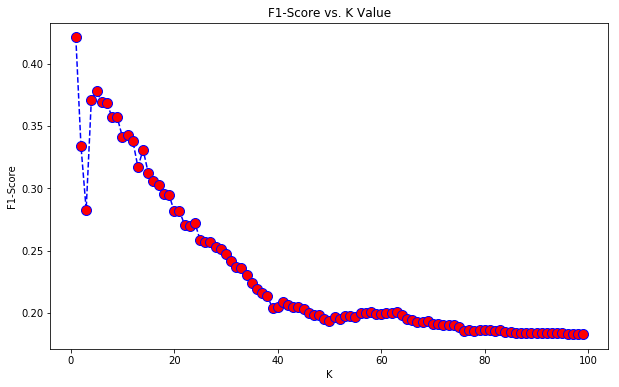

Best K value =  1


In [725]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [726]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4523333333333333
F1-Score =  0.42091962407734984
[[213 638  49]
 [134 838 128]
 [ 38 656 306]]


In [727]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5066666666666667
F1-Score =  0.4972015993946468
[[311 521  68]
 [182 773 145]
 [ 49 515 436]]


In [728]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.476
F1-Score =  0.47311342519312966
[[617 205  78]
 [577 316 207]
 [254 251 495]]


In [729]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5533333333333333
F1-Score =  0.5549588566062696
[[407 427  66]
 [213 704 183]
 [ 44 407 549]]


In [730]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5463333333333333
F1-Score =  0.5492606817334402
[[431 413  56]
 [250 692 158]
 [ 64 420 516]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [731]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

10.049585151672364  minutes
Accuracy Score =  0.5306666666666666
F1-Score =  0.5259072384992586
[[341 492  67]
 [180 746 174]
 [ 54 441 505]]


# Count Vectorizer

In [732]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df = 3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [733]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [734]:
X_train.shape

(14000, 6991)

In [735]:
X_test.shape

(3000, 6991)

In [736]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.528
F1-Score =  0.5226547376947333
[[381 470  49]
 [203 783 114]
 [ 70 510 420]]


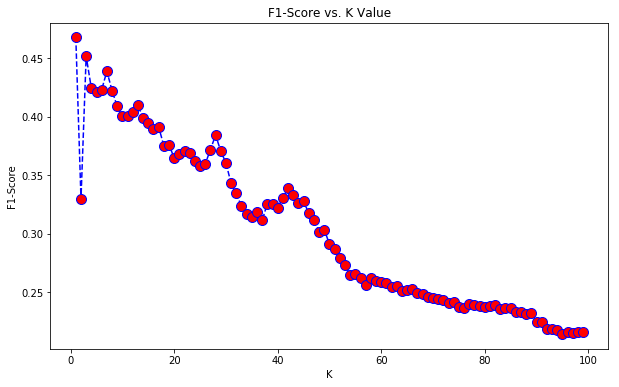

Best K value =  1


In [737]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [738]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.484
F1-Score =  0.46763885029696556
[[272 566  62]
 [162 792 146]
 [ 58 554 388]]


In [739]:
from sklearn.tree import DecisionTreeClassifier 


In [740]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [741]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [742]:
y_pred = dtree_model.predict(X_test)

In [743]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.51
F1-Score =  0.5047903635146201
[[352 483  65]
 [209 745 146]
 [ 67 500 433]]


In [744]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [745]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [746]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.46066666666666667
F1-Score =  0.4440269979109006
[[737 121  42]
 [764 209 127]
 [388 176 436]]


In [747]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5493333333333333
F1-Score =  0.5501843924573383
[[426 438  36]
 [239 748 113]
 [ 72 454 474]]


In [748]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [749]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [750]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5393333333333333
F1-Score =  0.5384017434490906
[[389 460  51]
 [202 746 152]
 [ 55 462 483]]


In [751]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [752]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

3.568592385450999  minutes


In [753]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.524
F1-Score =  0.5240880143817656
[[379 448  73]
 [230 685 185]
 [ 62 430 508]]


# One Hot Binarizer

In [754]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [755]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [756]:
X_train.shape

(14000, 6991)

In [757]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5313333333333333
F1-Score =  0.5259296468912714
[[381 473  46]
 [198 791 111]
 [ 66 512 422]]


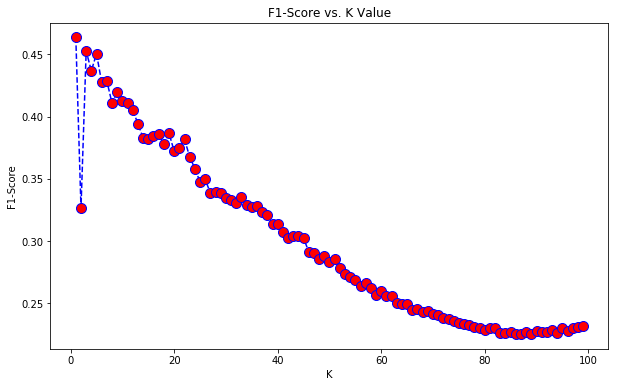

Best K value =  1


In [758]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [759]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48133333333333334
F1-Score =  0.4636045888765394
[[273 570  57]
 [164 802 134]
 [ 62 569 369]]


In [760]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5073333333333333
F1-Score =  0.5022652532051888
[[354 476  70]
 [211 736 153]
 [ 73 495 432]]


In [761]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4593333333333333
F1-Score =  0.4437167453431569
[[738 123  39]
 [764 219 117]
 [389 190 421]]


In [762]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5483333333333333
F1-Score =  0.5489728312357536
[[415 447  38]
 [235 749 116]
 [ 66 453 481]]


In [763]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5393333333333333
F1-Score =  0.5380386685767979
[[390 458  52]
 [199 751 150]
 [ 56 467 477]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [764]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.5854013204574584  minutes
Accuracy Score =  0.523
F1-Score =  0.5227452383551693
[[376 448  76]
 [228 685 187]
 [ 63 429 508]]


# Tf-IDF Vectorizer

In [765]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df = 3)
features2 = tfidf.fit_transform(df['Tweet'])

In [766]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [767]:
X_train.shape

(14000, 6991)

In [768]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5426666666666666
F1-Score =  0.541610985089932
[[407 456  37]
 [232 764 104]
 [ 71 472 457]]


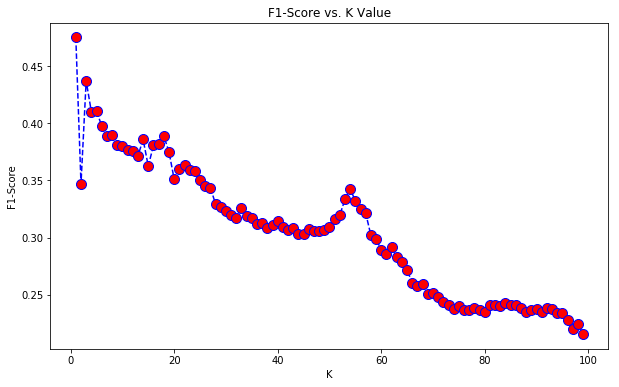

Best K value =  1


In [769]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [770]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.485
F1-Score =  0.47520004499891955
[[322 510  68]
 [176 753 171]
 [ 66 554 380]]


In [771]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5006666666666667
F1-Score =  0.49368244395106453
[[329 496  75]
 [196 740 164]
 [ 65 502 433]]


In [772]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4563333333333333
F1-Score =  0.43843608631999337
[[712 125  63]
 [742 193 165]
 [360 176 464]]


In [773]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5533333333333333
F1-Score =  0.5504581898670567
[[376 483  41]
 [187 794 119]
 [ 45 465 490]]


In [774]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5516666666666666
F1-Score =  0.5516432479479463
[[404 451  45]
 [216 757 127]
 [ 54 452 494]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [775]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.38914688428243  minutes
Accuracy Score =  0.5343333333333333
F1-Score =  0.5330979882650108
[[374 458  68]
 [205 712 183]
 [ 63 420 517]]


# Count Vectorizer

In [776]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df = 5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [777]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [778]:
X_train.shape

(14000, 2380)

In [779]:
X_test.shape

(3000, 2380)

In [780]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5106666666666667
F1-Score =  0.49776481128723926
[[313 566  21]
 [185 838  77]
 [ 47 572 381]]


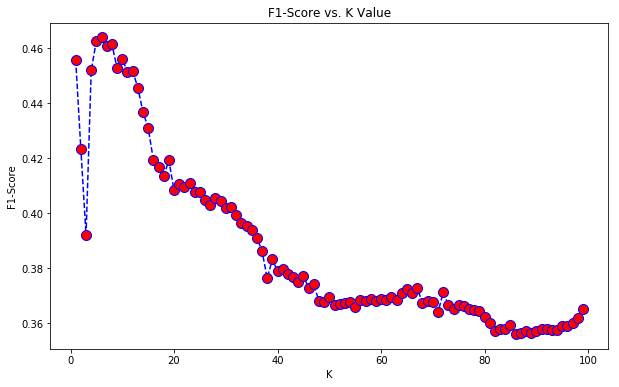

Best K value =  6


In [781]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [782]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.476
F1-Score =  0.4638366654401338
[[325 536  39]
 [241 759 100]
 [122 534 344]]


In [783]:
from sklearn.tree import DecisionTreeClassifier 


In [784]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [785]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [786]:
y_pred = dtree_model.predict(X_test)

In [787]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5043333333333333
F1-Score =  0.49377866696350686
[[303 542  55]
 [186 783 131]
 [ 54 519 427]]


In [788]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [789]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [790]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.429
F1-Score =  0.3766294066675863
[[834  35  31]
 [921  65 114]
 [547  65 388]]


In [791]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.52
F1-Score =  0.5130316011486036
[[359 519  22]
 [226 805  69]
 [ 66 538 396]]


In [792]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [793]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [794]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5203333333333333
F1-Score =  0.510948996672801
[[320 542  38]
 [175 811 114]
 [ 44 526 430]]


In [795]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [796]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

1.8029395659764609  minutes


In [797]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.51
F1-Score =  0.5019054566808071
[[302 535  63]
 [186 752 162]
 [ 47 477 476]]


# One Hot Binarizer

In [798]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [799]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [800]:
X_train.shape

(14000, 2380)

In [801]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5113333333333333
F1-Score =  0.49791795476384876
[[313 566  21]
 [183 844  73]
 [ 44 579 377]]


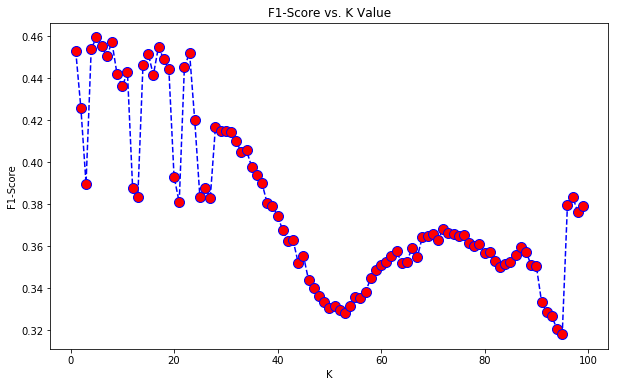

Best K value =  5


In [802]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [803]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48433333333333334
F1-Score =  0.45936857338830195
[[275 609  16]
 [170 870  60]
 [ 63 629 308]]


In [804]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5036666666666667
F1-Score =  0.4930609935135914
[[302 544  54]
 [189 784 127]
 [ 52 523 425]]


In [805]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.429
F1-Score =  0.3765430212738197
[[834  35  31]
 [926  64 110]
 [551  60 389]]


In [806]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5206666666666667
F1-Score =  0.5139245669304783
[[359 519  22]
 [225 803  72]
 [ 68 532 400]]


In [807]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.524
F1-Score =  0.514558192999179
[[323 541  36]
 [169 819 112]
 [ 42 528 430]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [808]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

1.7507750709851584  minutes
Accuracy Score =  0.5103333333333333
F1-Score =  0.5028543657670693
[[306 534  60]
 [185 751 164]
 [ 45 481 474]]


# Tf-IDF Vectorizer

In [809]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(2, 3), min_df = 5)
features2 = tfidf.fit_transform(df['Tweet'])

In [810]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [811]:
X_train.shape

(14000, 2380)

In [812]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5136666666666667
F1-Score =  0.5021200981619409
[[334 546  20]
 [198 835  67]
 [ 52 576 372]]


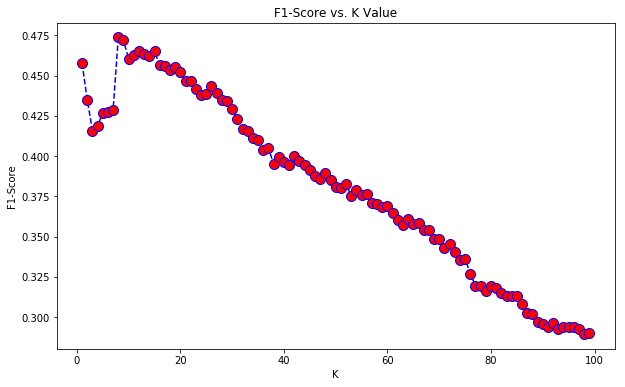

Best K value =  8


In [813]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [814]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48966666666666664
F1-Score =  0.4736510541714088
[[305 571  24]
 [192 823  85]
 [ 62 597 341]]


In [815]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.502
F1-Score =  0.490567130917182
[[295 556  49]
 [175 789 136]
 [ 48 530 422]]


In [816]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.447
F1-Score =  0.40190447537246876
[[814  49  37]
 [901  80 119]
 [492  61 447]]


In [817]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.527
F1-Score =  0.5137389467653187
[[309 563  28]
 [159 861  80]
 [ 34 555 411]]


In [818]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5226666666666666
F1-Score =  0.5137769601176673
[[319 544  37]
 [185 811 104]
 [ 41 521 438]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [819]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

1.8395041664441427  minutes
Accuracy Score =  0.514
F1-Score =  0.5062994596424554
[[305 537  58]
 [183 755 162]
 [ 47 471 482]]


# Uni-Bi-Trigrams

# Count Vectorizer

In [820]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df=1)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [821]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [822]:
X_train.shape

(14000, 308595)

In [823]:
X_test.shape

(3000, 308595)

In [824]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.66
F1-Score =  0.6656524851771278
[[574 288  38]
 [182 748 170]
 [ 32 310 658]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

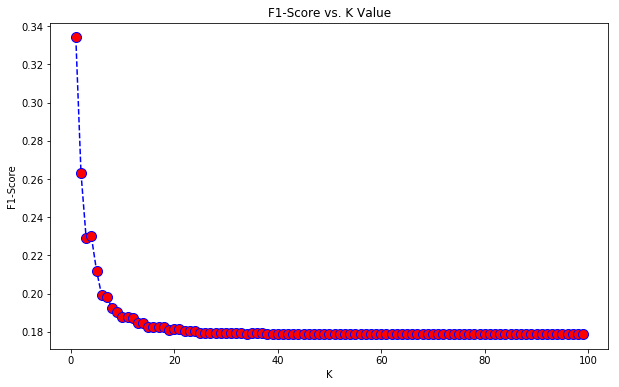

Best K value =  1


In [825]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [826]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.43
F1-Score =  0.3341400479053623
[[  87  806    7]
 [  23 1029   48]
 [   9  817  174]]


In [827]:
from sklearn.tree import DecisionTreeClassifier 


In [828]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [829]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [830]:
y_pred = dtree_model.predict(X_test)

In [831]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.591
F1-Score =  0.5940909897548877
[[575 246  79]
 [305 538 257]
 [ 72 268 660]]


In [832]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

In [833]:
# gnb.fit(X_train.toarray(), y_train)

In [834]:
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [835]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [836]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [837]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [838]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6693333333333333
F1-Score =  0.6745219259576928
[[592 267  41]
 [194 726 180]
 [ 33 277 690]]


In [839]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [840]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

75.72025793393453  minutes


In [841]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.667
F1-Score =  0.6721624775794414
[[548 334  18]
 [161 808 131]
 [ 35 320 645]]


# One Hot Binarizer

In [842]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [843]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [844]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.655
F1-Score =  0.6607749302881497
[[564 299  37]
 [182 746 172]
 [ 30 315 655]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

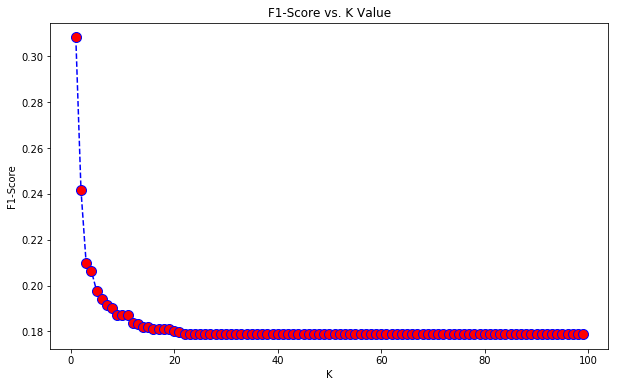

Best K value =  1


In [845]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [846]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.41833333333333333
F1-Score =  0.30821273809079003
[[  70  828    2]
 [  21 1045   34]
 [   7  853  140]]


In [847]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5853333333333334
F1-Score =  0.5888740259920721
[[568 260  72]
 [303 542 255]
 [ 81 273 646]]


In [848]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train.toarray(), y_train)
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [849]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [850]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6713333333333333
F1-Score =  0.6764693505513707
[[597 263  40]
 [196 723 181]
 [ 34 272 694]]


In [851]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

81.72526238361995  minutes
Accuracy Score =  0.6663333333333333
F1-Score =  0.671821672007728
[[552 330  18]
 [163 799 138]
 [ 33 319 648]]


# Tf-IDF Vectorizer

In [852]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(ngram_range=(1, 3), min_df=1)
features2 = tfidf.fit_transform(df['Tweet'])

In [853]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [854]:
X_train.shape

(14000, 308595)

In [855]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6633333333333333
F1-Score =  0.66890195491729
[[610 259  31]
 [228 695 177]
 [ 40 275 685]]


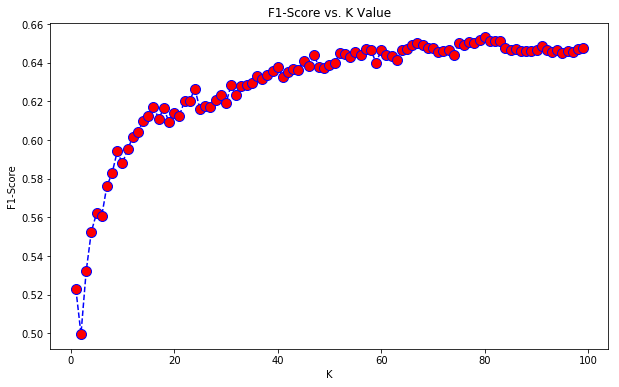

Best K value =  80


In [856]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [857]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.652
F1-Score =  0.6530976461244068
[[593 233  74]
 [224 593 283]
 [ 42 188 770]]


In [858]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.575
F1-Score =  0.5789016406168979
[[544 275  81]
 [301 563 236]
 [ 89 293 618]]


In [859]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train.toarray(), y_train)
# y_pred = gnb.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [860]:
# from sklearn.naive_bayes import MultinomialNB
# MNB = MultinomialNB()
# MNB.fit(X_train.toarray(), y_train)
# y_pred = MNB.predict(X_test.toarray())
# print("Accuracy Score = ", accuracy_score(y_test, y_pred))
# print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
# print(confusion_matrix(y_test, y_pred))

In [861]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.663
F1-Score =  0.6676300211793981
[[621 245  34]
 [247 659 194]
 [ 45 246 709]]


In [862]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

78.16361327171326  minutes
Accuracy Score =  0.665
F1-Score =  0.6706942478807046
[[565 314  21]
 [178 789 133]
 [ 35 324 641]]


# Count Vectorizer

In [863]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df=2)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [864]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [865]:
X_train.shape

(14000, 37029)

In [866]:
X_test.shape

(3000, 37029)

In [867]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.612
F1-Score =  0.6165736973010616
[[590 235  75]
 [259 620 221]
 [ 64 310 626]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

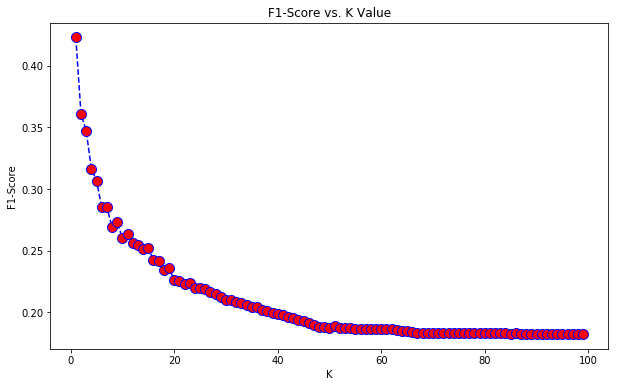

Best K value =  1


In [868]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [869]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4766666666666667
F1-Score =  0.422858967997352
[[131 720  49]
 [ 45 936 119]
 [ 14 623 363]]


In [870]:
from sklearn.tree import DecisionTreeClassifier 


In [871]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [872]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [873]:
y_pred = dtree_model.predict(X_test)

In [874]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5816666666666667
F1-Score =  0.5834978779412521
[[564 248  88]
 [314 512 274]
 [ 85 246 669]]


In [875]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [876]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [877]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5213333333333333
F1-Score =  0.520072477469721
[[598 225  77]
 [479 370 251]
 [170 234 596]]


In [878]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6486666666666666
F1-Score =  0.6490488185855342
[[719 151  30]
 [370 524 206]
 [ 68 229 703]]


In [879]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [880]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [881]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.651
F1-Score =  0.6561473373872878
[[607 239  54]
 [223 674 203]
 [ 40 288 672]]


In [882]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [883]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

9.917091715335847  minutes


In [884]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6656666666666666
F1-Score =  0.6715482750537988
[[589 287  24]
 [212 739 149]
 [ 39 292 669]]


# One Hot Binarizer

In [885]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [886]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [887]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6153333333333333
F1-Score =  0.6198057813145792
[[584 242  74]
 [262 630 208]
 [ 63 305 632]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

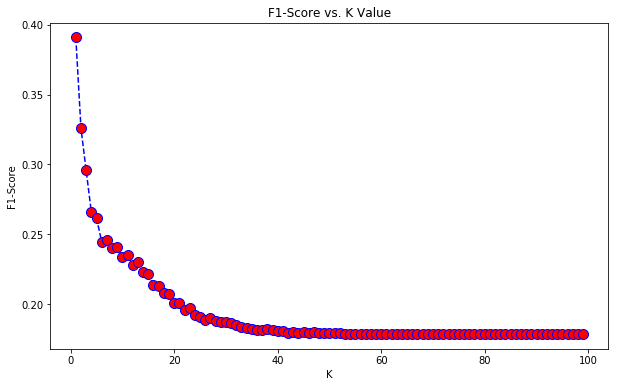

Best K value =  1


In [888]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [889]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.46166666666666667
F1-Score =  0.3907855149348145
[[ 96 775  29]
 [ 30 980  90]
 [ 12 679 309]]


In [890]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5813333333333334
F1-Score =  0.5845501518787203
[[560 261  79]
 [306 536 258]
 [ 82 270 648]]


In [891]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.521
F1-Score =  0.5196098655455105
[[599 227  74]
 [481 366 253]
 [169 233 598]]


In [892]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6513333333333333
F1-Score =  0.6523131683735752
[[708 158  34]
 [353 540 207]
 [ 65 229 706]]


In [893]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6566666666666666
F1-Score =  0.6614097595633587
[[606 234  60]
 [216 685 199]
 [ 40 281 679]]


In [894]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

9.465545161565144  minutes
Accuracy Score =  0.6686666666666666
F1-Score =  0.6742812818460252
[[589 287  24]
 [205 745 150]
 [ 42 286 672]]


# Tf-IDF Vectorizer

In [895]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3),min_df=2)
features2 = tfidf.fit_transform(df['Tweet'])

In [896]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [897]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6613333333333333
F1-Score =  0.665472023241343
[[639 220  41]
 [262 634 204]
 [ 43 246 711]]


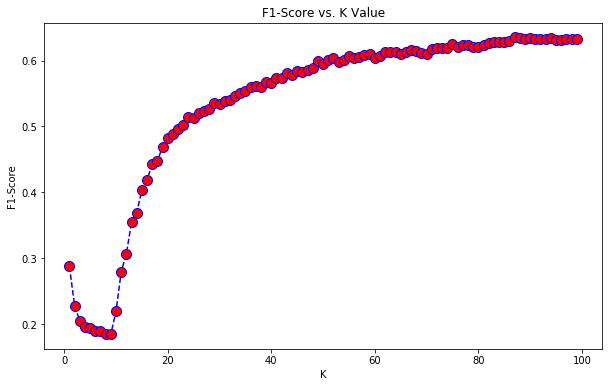

Best K value =  87


In [898]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [899]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6326666666666667
F1-Score =  0.6350504923486852
[[471 406  23]
 [122 853 125]
 [ 26 400 574]]


In [900]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.58
F1-Score =  0.583555819144309
[[559 252  89]
 [290 569 241]
 [ 94 294 612]]


In [901]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.509
F1-Score =  0.5105569218835166
[[527 275  98]
 [423 411 266]
 [151 260 589]]


In [902]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6616666666666666
F1-Score =  0.6674840916869521
[[595 272  33]
 [203 705 192]
 [ 33 282 685]]


In [903]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6766666666666666
F1-Score =  0.6800584482333852
[[653 201  46]
 [249 647 204]
 [ 43 227 730]]


In [904]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

7.873240514596303  minutes
Accuracy Score =  0.6623333333333333
F1-Score =  0.6676384216632768
[[606 264  30]
 [244 688 168]
 [ 44 263 693]]


# Count Vectorizer

In [905]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df = 3)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [906]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [907]:
X_train.shape

(14000, 14428)

In [908]:
X_test.shape

(3000, 14428)

In [909]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6
F1-Score =  0.6040380778419542
[[578 233  89]
 [272 609 219]
 [ 74 313 613]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


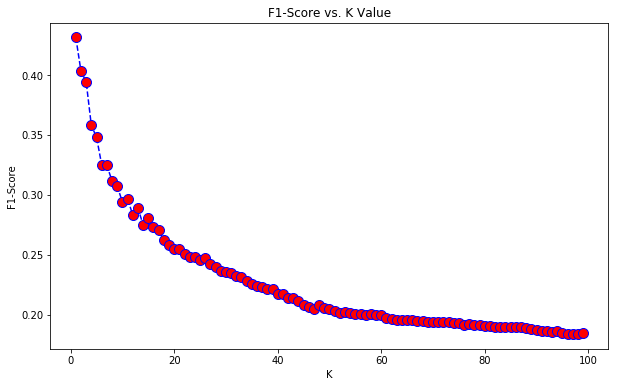

Best K value =  1


In [910]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [911]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.4806666666666667
F1-Score =  0.43134192139691835
[[132 701  67]
 [ 63 902 135]
 [ 30 562 408]]


In [912]:
from sklearn.tree import DecisionTreeClassifier 


In [913]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [914]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [915]:
y_pred = dtree_model.predict(X_test)

In [916]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5766666666666667
F1-Score =  0.5795569404960893
[[570 244  86]
 [305 519 276]
 [ 85 274 641]]


In [917]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [918]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [919]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5043333333333333
F1-Score =  0.49307373157909806
[[624 173 103]
 [538 270 292]
 [207 174 619]]


In [920]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6453333333333333
F1-Score =  0.6455783265601142
[[726 144  30]
 [387 518 195]
 [ 74 234 692]]


In [921]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [922]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [923]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.645
F1-Score =  0.6503210813323174
[[610 232  58]
 [232 663 205]
 [ 38 300 662]]


In [924]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [925]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

4.623515717188517  minutes


In [926]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6596666666666666
F1-Score =  0.665394243026937
[[602 268  30]
 [229 706 165]
 [ 43 286 671]]


# One Hot Binarizer

In [927]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [928]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [929]:
X_train.shape

(14000, 14428)

In [930]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6016666666666667
F1-Score =  0.6058045074476682
[[574 242  84]
 [275 618 207]
 [ 74 313 613]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

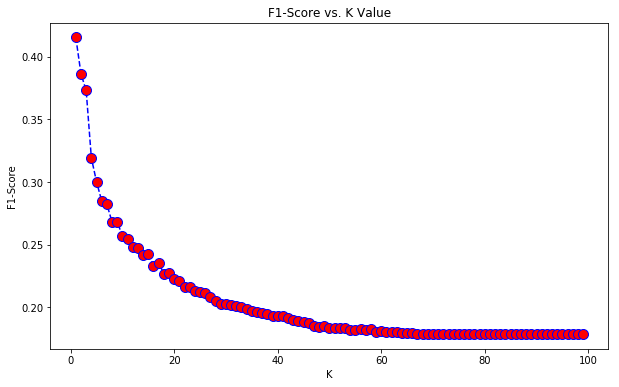

Best K value =  1


In [931]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [932]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47533333333333333
F1-Score =  0.4151774655724158
[[ 99 717  84]
 [ 31 906 163]
 [ 15 564 421]]


In [933]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.567
F1-Score =  0.5698478770324439
[[560 254  86]
 [317 503 280]
 [ 86 276 638]]


In [934]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.502
F1-Score =  0.4904256687655521
[[623 175 102]
 [541 265 294]
 [209 173 618]]


In [935]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6493333333333333
F1-Score =  0.649246161429456
[[722 144  34]
 [369 522 209]
 [ 72 224 704]]


In [936]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6516666666666666
F1-Score =  0.6563526112431917
[[600 235  65]
 [218 680 202]
 [ 40 285 675]]


In [937]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

5.660195410251617  minutes
Accuracy Score =  0.6603333333333333
F1-Score =  0.6656697799846686
[[599 267  34]
 [223 696 181]
 [ 42 272 686]]


# Tf-IDF Vectorizer

In [938]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df = 3)
features2 = tfidf.fit_transform(df['Tweet'])

In [939]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [940]:
X_train.shape

(14000, 14428)

In [941]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6576666666666666
F1-Score =  0.6619197679358616
[[644 214  42]
 [262 629 209]
 [ 45 255 700]]


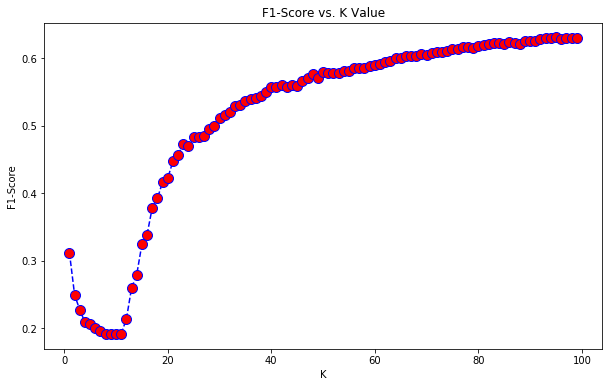

Best K value =  95


In [942]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [943]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6293333333333333
F1-Score =  0.6308342963180862
[[454 421  25]
 [117 856 127]
 [ 24 398 578]]


In [944]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5646666666666667
F1-Score =  0.5674857149038625
[[539 272  89]
 [313 524 263]
 [101 268 631]]


In [945]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49466666666666664
F1-Score =  0.4877435341893926
[[577 205 118]
 [497 297 306]
 [182 208 610]]


In [946]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6733333333333333
F1-Score =  0.6781323569934824
[[659 206  35]
 [234 669 197]
 [ 44 264 692]]


In [947]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.671
F1-Score =  0.6746847108291462
[[646 208  46]
 [246 646 208]
 [ 44 235 721]]


In [948]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

4.1943748990694685  minutes
Accuracy Score =  0.6646666666666666
F1-Score =  0.6692676153528319
[[620 247  33]
 [251 671 178]
 [ 52 245 703]]


# Count Vectorizer

In [949]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df = 5)
features = vectorizer.fit_transform(df['Tweet'])
sentiment = df['Sentiment Polarity']

In [950]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [951]:
X_train.shape

(14000, 7265)

In [952]:
X_test.shape

(3000, 7265)

In [953]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.612
F1-Score =  0.6165705234902011
[[606 224  70]
 [280 618 202]
 [ 69 319 612]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

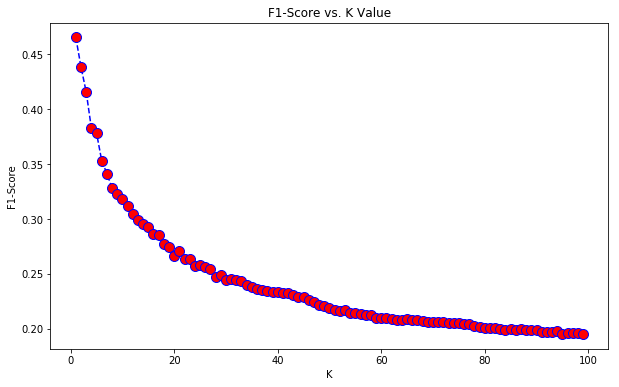

Best K value =  1


In [954]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [955]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5
F1-Score =  0.46544957817244964
[[169 661  70]
 [ 86 841 173]
 [ 32 478 490]]


In [956]:
from sklearn.tree import DecisionTreeClassifier 


In [957]:
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

In [958]:
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [959]:
y_pred = dtree_model.predict(X_test)

In [960]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5623333333333334
F1-Score =  0.5648590620645443
[[554 259  87]
 [318 494 288]
 [ 92 269 639]]


In [961]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [962]:
gnb.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [963]:
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49333333333333335
F1-Score =  0.46221848847567504
[[720  95  85]
 [703 150 247]
 [294  96 610]]


In [964]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6483333333333333
F1-Score =  0.6474553858082371
[[743 127  30]
 [396 506 198]
 [ 73 231 696]]


In [965]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')

In [966]:
log_model = log_model.fit(X_train, y_train)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [967]:
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.646
F1-Score =  0.6512572306781492
[[607 229  64]
 [229 671 200]
 [ 35 305 660]]


In [968]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

In [969]:
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")

2.7776724815368654  minutes


In [970]:
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6616666666666666
F1-Score =  0.6666489464240626
[[622 244  34]
 [254 668 178]
 [ 46 259 695]]


# One Hot Binarizer

In [971]:
from sklearn.preprocessing import Binarizer
onehot = Binarizer()
features1 = onehot.fit_transform(features)

In [972]:
X_train, X_test, y_train, y_test  = train_test_split(
        features1, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [973]:
X_train.shape

(14000, 7265)

In [974]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6026666666666667
F1-Score =  0.6070759634102408
[[584 234  82]
 [289 610 201]
 [ 67 319 614]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

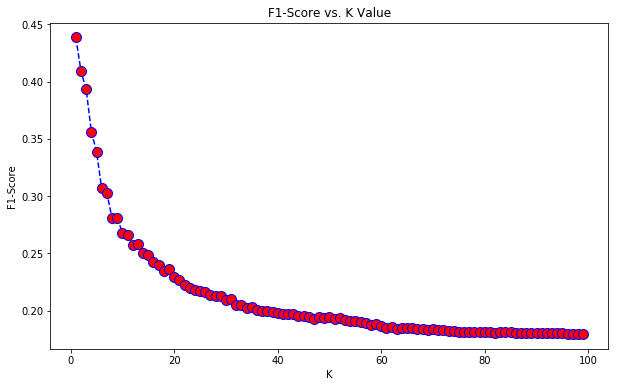

Best K value =  1


In [975]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [976]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.48233333333333334
F1-Score =  0.43864955575130943
[[139 658 103]
 [ 60 844 196]
 [ 25 511 464]]


In [977]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5743333333333334
F1-Score =  0.5765268228503523
[[561 253  86]
 [304 502 294]
 [ 83 257 660]]


In [978]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.487
F1-Score =  0.4543576424319354
[[720  95  85]
 [708 140 252]
 [305  94 601]]


In [979]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.654
F1-Score =  0.6531795502170775
[[739 130  31]
 [378 516 206]
 [ 72 221 707]]


In [980]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6496666666666666
F1-Score =  0.6550192680932521
[[610 233  57]
 [231 678 191]
 [ 36 303 661]]


In [981]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.0621036489804587  minutes
Accuracy Score =  0.655
F1-Score =  0.6595991816797903
[[610 249  41]
 [247 656 197]
 [ 47 254 699]]


# Tf-IDF Vectorizer

In [982]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(analyzer = 'word', lowercase = True,ngram_range=(1, 3), min_df = 5)
features2 = tfidf.fit_transform(df['Tweet'])

In [983]:
X_train, X_test, y_train, y_test  = train_test_split(
        features2, 
        sentiment,
        train_size=0.82352942, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [984]:
X_train.shape

(14000, 7265)

In [985]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6633333333333333
F1-Score =  0.6671816090657678
[[651 206  43]
 [261 633 206]
 [ 49 245 706]]


/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurav/anaconda3/

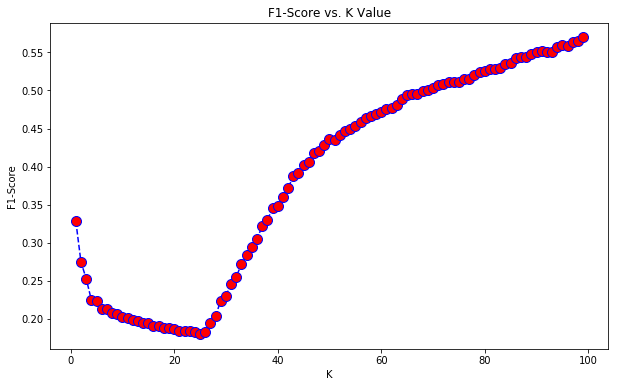

Best K value =  99


In [986]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
# plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k_data2-3.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [987]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.586
F1-Score =  0.569621220972678
[[313 575  12]
 [ 40 983  77]
 [  8 530 462]]


In [988]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5756666666666667
F1-Score =  0.5791721155830376
[[561 246  93]
 [274 538 288]
 [ 83 289 628]]


In [989]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5063333333333333
F1-Score =  0.4786782585762861
[[705 118  77]
 [664 170 266]
 [243 113 644]]


In [990]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train.toarray(), y_train)
y_pred = MNB.predict(X_test.toarray())
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6653333333333333
F1-Score =  0.6692823450880377
[[671 194  35]
 [274 623 203]
 [ 46 252 702]]


In [991]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.6683333333333333
F1-Score =  0.6723003031635124
[[645 209  46]
 [244 648 208]
 [ 44 244 712]]


In [992]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.7428815722465516  minutes
Accuracy Score =  0.66
F1-Score =  0.6639137535128338
[[632 231  37]
 [270 637 193]
 [ 56 233 711]]
